# **<center>👆Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning👆</center>**

<center>

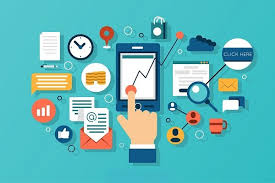

This project aims to revolutionize marketing campaigns by harnessing the power of machine learning to predict and understand customer personalities. By analyzing various data sources and employing advanced algorithms, we will develop a model that categorizes customers into distinct personality types, enabling businesses to tailor their marketing strategies to individual preferences and behavior. The project will not only increase the effectiveness of marketing efforts but also enhance customer engagement, satisfaction, and ultimately, business success.

---

## **💰Business Statement💰**
Our business is committed to delivering cutting-edge machine learning solutions that predict customer personality traits to empower companies with more effective and personalized marketing campaigns. We strive to revolutionize the way businesses interact with their customers, leading to increased engagement, satisfaction, and ultimately, business growth.


## **🎯Objective🎯**
Our primary objective is to develop a robust and scalable machine learning model that accurately predicts customer personality traits based on various data sources. We aim to provide businesses with a tool that allows them to segment their customer base, understand individual preferences, and deliver highly targeted marketing messages. Through this, we intend to enhance customer experiences, drive higher conversion rates, and ultimately, boost our clients' return on investment.

---

##**Project Walkthrough**
This is my plan of work for my project step by step to create the model and goals that we wanted from this project:


1. **Conversion Rate Analysis📊**

Begin with a comprehensive analysis of conversion rates to understand the current marketing effectiveness. Identify areas that require improvement.

2. **Feature Engineering🛠️**

Create insightful features from available data to enhance the model's predictive power. Craft variables that capture relevant customer behaviors and characteristics.

3. **Data Cleaning/Preprocessing🧹**

Prepare the data for machine learning by cleaning, standardizing, and encoding it. Ensure uniformity and consistency in the dataset.

4. **Modeling🤖**

Utilize machine learning algorithms to build a predictive model. Train and fine-tune the model using the cleaned and engineered data.

5. **Calculate the Impact📈**

Assess the impact of the machine learning model on marketing campaigns. Calculate the improvements in customer engagement.

---

📊 Libraries Used:

* **Pandas** and **NumPy** for data analysis and manipulation
* **Matplotlib and **Seaborn** for data visualization
* **Scipy** for statistical analysis
* **Scikit-learn** for machine learning

---

📂 Data Source:

The project utilizes a data source accessible via a link provided in Google Drive. for more information about the dataset [Click Here](https://drive.google.com/file/d/1lKktNkMRaJ053dZhEuNiBTeL8w7Hq0qO/view?usp=share_link).




##Import Library

In [ ]:
#for analyzing the data
import pandas as pd
import numpy as np

#for the diagram data
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#for the statistics
import math
from scipy import stats
from scipy.stats import skew  # Import skew for calculating skewness

#import sklearn for the machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

#for modelling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

# Set display options for Pandas
pd.set_option('display.max_rows', 1000)     # Display all rows
pd.set_option('display.max_columns', 1000)  # Display all columns
pd.set_option('display.width', 100)        # Adjust the width of the display

#set ignore the warnings
import warnings
warnings.filterwarnings('ignore')

##Access Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ganti dengan path dataset Anda di Google Drive
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/marketing_campaign_data.csv'

# Baca dataset dengan pandas
df = pd.read_csv(dataset_path)

##Data Preparation

In [ ]:
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0         0   
1           1  2174        1954        S1         Lajang  46344000.0        1         1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4           4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  04-09-2012       58   635000      88000           546000           172000             88000   
1  08-03-2014       38    11000       1000             6000             2000              1000   
2  21-08-2013       26   426000      49000           127000           111000             21000   
3  10-02-2014       26    11000       4000            20000            10000              3000   
4  19-01-2014       94   173000      43000           118000            46000             27000   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0         88000                  3                8                   10                  4   
1          6000                  2                1                    1                  2   
2         42000                  1                8                    2                 10   
3          5000                  2                2                    0                  4   
4         15000                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                  7             0             0             0             0             0   
1                  5             0             0             0             0             0   
2                  4             0             0             0             0             0   
3                  6             0             0             0             0             0   
4                  5             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [ ]:
df.shape

(2240, 30)

Based on the provided information about the dataset, here's a summary of its key characteristics:

* Number of Rows: 2,240

* Number of Column
: 30

Column Types:

* Integer Columns: 26 columns contain integer data types.

* Float Columns: 1 column contains float data type.

* Object (String) Columns: 3 columns contain object (string) data types.



Missing Values:

* Income Column: There are missing values in the 'Income' column. It has 24 missing values out of 2,240 rows.

##Conversion Rate Analysis📈

In [ ]:
# Loop through each column and print unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("-" * 30)

Column 'Unnamed: 0' has 2240 unique values:
[   0    1    2 ... 2237 2238 2239]
------------------------------
Column 'ID' has 2240 unique values:
[5524 2174 4141 ... 7270 8235 9405]
------------------------------
Column 'Year_Birth' has 59 unique values:
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
------------------------------
Column 'Education' has 5 unique values:
['S1' 'S3' 'S2' 'SMA' 'D3']
------------------------------
Column 'Marital_Status' has 6 unique values:
['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']
------------------------------
Column 'Income' has 1975 unique values:
[58138000. 46344000. 71613000. ... 56981000. 69245000. 52869000.]
------------------------------
Column 'Kidhome' has 3 unique values:
[0 1

In [ ]:
# Display the updated dataset
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0         0   
1           1  2174        1954        S1         Lajang  46344000.0        1         1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4           4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  04-09-2012       58   635000      88000           546000           172000             88000   
1  08-03-2014       38    11000       1000             6000             2000              1000   
2  21-08-2013       26   426000      49000           127000           111000             21000   
3  10-02-2014       26    11000       4000            20000            10000              3000   
4  19-01-2014       94   173000      43000           118000            46000             27000   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0         88000                  3                8                   10                  4   
1          6000                  2                1                    1                  2   
2         42000                  1                8                    2                 10   
3          5000                  2                2                    0                  4   
4         15000                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                  7             0             0             0             0             0   
1                  5             0             0             0             0             0   
2                  4             0             0             0             0             0   
3                  6             0             0             0             0             0   
4                  5             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  
0         0              3         11         1  
1         0              3         11         0  
2         0              3         11         0  
3         0              3         11         0  
4         0              3         11         0

In [ ]:
# Define categorical and numeric columns
categorical_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1',
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
            'AcceptedCmp5', 'Complain', 'Response']

numeric_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
            'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

# Separate categorical and numeric columns
df_categorical = df[categorical_cols]
df_numeric = df[numeric_cols]

# Display the first few rows of each subset
print("\nCategorical Columns DataFrame:\n")
print(df_categorical.head())

print("\nNumeric Columns DataFrame:\n")
print(df_numeric.head())


Categorical Columns DataFrame:

     ID Education Marital_Status  AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  \
0  5524        S1         Lajang             0             0             0             0   
1  2174        S1         Lajang             0             0             0             0   
2  4141        S1    Bertunangan             0             0             0             0   
3  6182        S1    Bertunangan             0             0             0             0   
4  5324        S3        Menikah             0             0             0             0   

   AcceptedCmp5  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

Numeric Columns DataFrame:

   Year_Birth      Income  Kidhome  Teenhome  Recency  MntCoke  MntFruits  MntMeatProducts  \
0        1957  58138000.0        0         0       58   635000 

In [ ]:
# Summary Statistics
print("\nSummary Statistics:\n")
df_numeric.describe()


Summary Statistics:



Year_Birth        Income      Kidhome     Teenhome      Recency       MntCoke  \
count  2240.000000  2.216000e+03  2240.000000  2240.000000  2240.000000  2.240000e+03   
mean   1968.805804  5.224725e+07     0.444196     0.506250    49.109375  3.039357e+05   
std      11.984069  2.517308e+07     0.538398     0.544538    28.962453  3.365974e+05   
min    1893.000000  1.730000e+06     0.000000     0.000000     0.000000  0.000000e+00   
25%    1959.000000  3.530300e+07     0.000000     0.000000    24.000000  2.375000e+04   
50%    1970.000000  5.138150e+07     0.000000     0.000000    49.000000  1.735000e+05   
75%    1977.000000  6.852200e+07     1.000000     1.000000    74.000000  5.042500e+05   
max    1996.000000  6.666660e+08     2.000000     2.000000    99.000000  1.493000e+06   

           MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts   MntGoldProds  \
count    2240.000000     2.240000e+03      2240.000000       2240.000000    2240.000000   
mean    26302.232143     1.669500e+05     37525.446429      27062.946429   44021.875000   
std     39773.433765     2.257154e+05     54628.979403      41280.498488   52167.438915   
min         0.000000     0.000000e+00         0.000000          0.000000       0.000000   
25%      1000.000000     1.600000e+04      3000.000000       1000.000000    9000.000000   
50%      8000.000000     6.700000e+04     12000.000000       8000.000000   24000.000000   
75%     33000.000000     2.320000e+05     50000.000000      33000.000000   56000.000000   
max    199000.000000     1.725000e+06    259000.000000     263000.000000  362000.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count        2240.000000      2240.000000          2240.000000        2240.000000   
mean            2.325000         4.084821             2.662054           5.790179   
std             1.932238         2.778714             2.923101           3.250958   
min             0.000000         0.000000             0.000000           0.000000   
25%             1.000000         2.000000             0.000000           3.000000   
50%             2.000000         4.000000             2.000000           5.000000   
75%             3.000000         6.000000             4.000000           8.000000   
max            15.000000        27.000000            28.000000          13.000000   

       NumWebVisitsMonth  Z_CostContact  Z_Revenue  
count        2240.000000         2240.0     2240.0  
mean            5.316518            3.0       11.0  
std             2.426645            0.0        0.0  
min             0.000000            3.0       11.0  
25%             3.000000            3.0       11.0  
50%             6.000000            3.0       11.0  
75%             7.000000            3.0       11.0  
max            20.000000            3.0       11.0

In [ ]:
# Initialize an empty DataFrame to store results
result_df = pd.DataFrame(columns=['Column Name', 'Skewness', 'Kurtosis', 'Type of Distribution'])

# Loop through numeric columns
for column in numeric_cols:
    data = df[column].dropna()  # Drop missing values (NaN)

    # Calculate skewness and kurtosis
    skewness = data.skew()
    kurtosis_val = data.kurtosis()

    # Determine the type of distribution
    distribution_type = None

    if -0.5 <= skewness <= 0.5:
        distribution_type = "Approximately Symmetrical (Nearly Normal)"
    elif skewness < -1.0:
        distribution_type = "Highly Negatively Skewed"
    elif skewness > 1.0:
        distribution_type = "Highly Positively Skewed"
    elif -1.0 <= skewness < -0.5:
        distribution_type = "Moderately Negatively Skewed"
    elif 0.5 < skewness <= 1.0:
        distribution_type = "Moderately Positively Skewed"

    # Update the results DataFrame
    result_df = result_df.append({'Column Name': column,
                                  'Skewness': round(skewness, 3),
                                  'Kurtosis': round(kurtosis_val, 3),
                                  'Type of Distribution': distribution_type}, ignore_index=True)

# Identify specific cases of Uniform and Bimodal distributions
result_df.loc[result_df["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
result_df.loc[result_df["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"

# Display the summarized results
result_df

Column Name  Skewness  Kurtosis                       Type of Distribution
0            Year_Birth    -0.350     0.717  Approximately Symmetrical (Nearly Normal)
1                Income     6.763   159.637                   Highly Positively Skewed
2               Kidhome     0.635    -0.780                       Bimodal Distribution
3              Teenhome     0.407    -0.986                       Bimodal Distribution
4               Recency    -0.002    -1.202  Approximately Symmetrical (Nearly Normal)
5               MntCoke     1.176     0.599                   Highly Positively Skewed
6             MntFruits     2.102     4.051                   Highly Positively Skewed
7       MntMeatProducts     2.083     5.517                   Highly Positively Skewed
8       MntFishProducts     1.920     3.096                   Highly Positively Skewed
9      MntSweetProducts     2.136     4.377                   Highly Positively Skewed
10         MntGoldProds     1.886     3.552                   Highly Positively Skewed
11    NumDealsPurchases     2.419     8.937                   Highly Positively Skewed
12      NumWebPurchases     1.383     5.703                   Highly Positively Skewed
13  NumCatalogPurchases     1.881     8.047                   Highly Positively Skewed
14    NumStorePurchases     0.702    -0.622               Moderately Positively Skewed
15    NumWebVisitsMonth     0.208     1.822  Approximately Symmetrical (Nearly Normal)
16        Z_CostContact     0.000     0.000                       Uniform Distribution
17            Z_Revenue     0.000     0.000                       Uniform Distribution

Here's a summary of the key information from the provided results:

Skewness: Skewness is a measure of the asymmetry or departure from symmetry in a distribution.

* Most columns have skewness values greater than 1, indicating that they are highly positively skewed. This means that the tail on the right side of the distribution is longer or fatter than the left side.
* Columns with skewness values between -0.5 and 0.5 are considered to have an approximately symmetrical (nearly normal) distribution.
* "Kidhome" and "Teenhome" columns are identified as having a bimodal distribution based on their skewness values.

Kurtosis: Kurtosis measures the tailedness or peakedness of a distribution compared to a normal distribution.

* Several columns have high positive kurtosis values, indicating that they have heavier tails and are more peaked compared to a normal distribution.
* "NumDealsPurchases," "NumWebPurchases," and "NumCatalogPurchases" have notably high positive kurtosis values.

Type of Distribution: This column specifies the type of distribution based on skewness values.

* Most columns are classified as "Highly Positively Skewed" due to their skewness values greater than 1.
* "Year_Birth," "Recency," and "NumWebVisitsMonth" are classified as * "Approximately Symmetrical (Nearly Normal)" because their skewness values are close to zero.
* "Kidhome" and "Teenhome" are classified as having a "Bimodal Distribution," suggesting the presence of two distinct modes in their distributions.
* "Z_CostContact" and "Z_Revenue" are classified as having a "Uniform Distribution," which means they have constant values with no variation.


These results provide insights into the distribution characteristics of the numeric columns, to helping understand the shape of the data and potential patterns. The skewness and kurtosis values give a sense of the departure from a normal distribution, and the "Type of Distribution" column provides descriptive labels for each column's distribution.

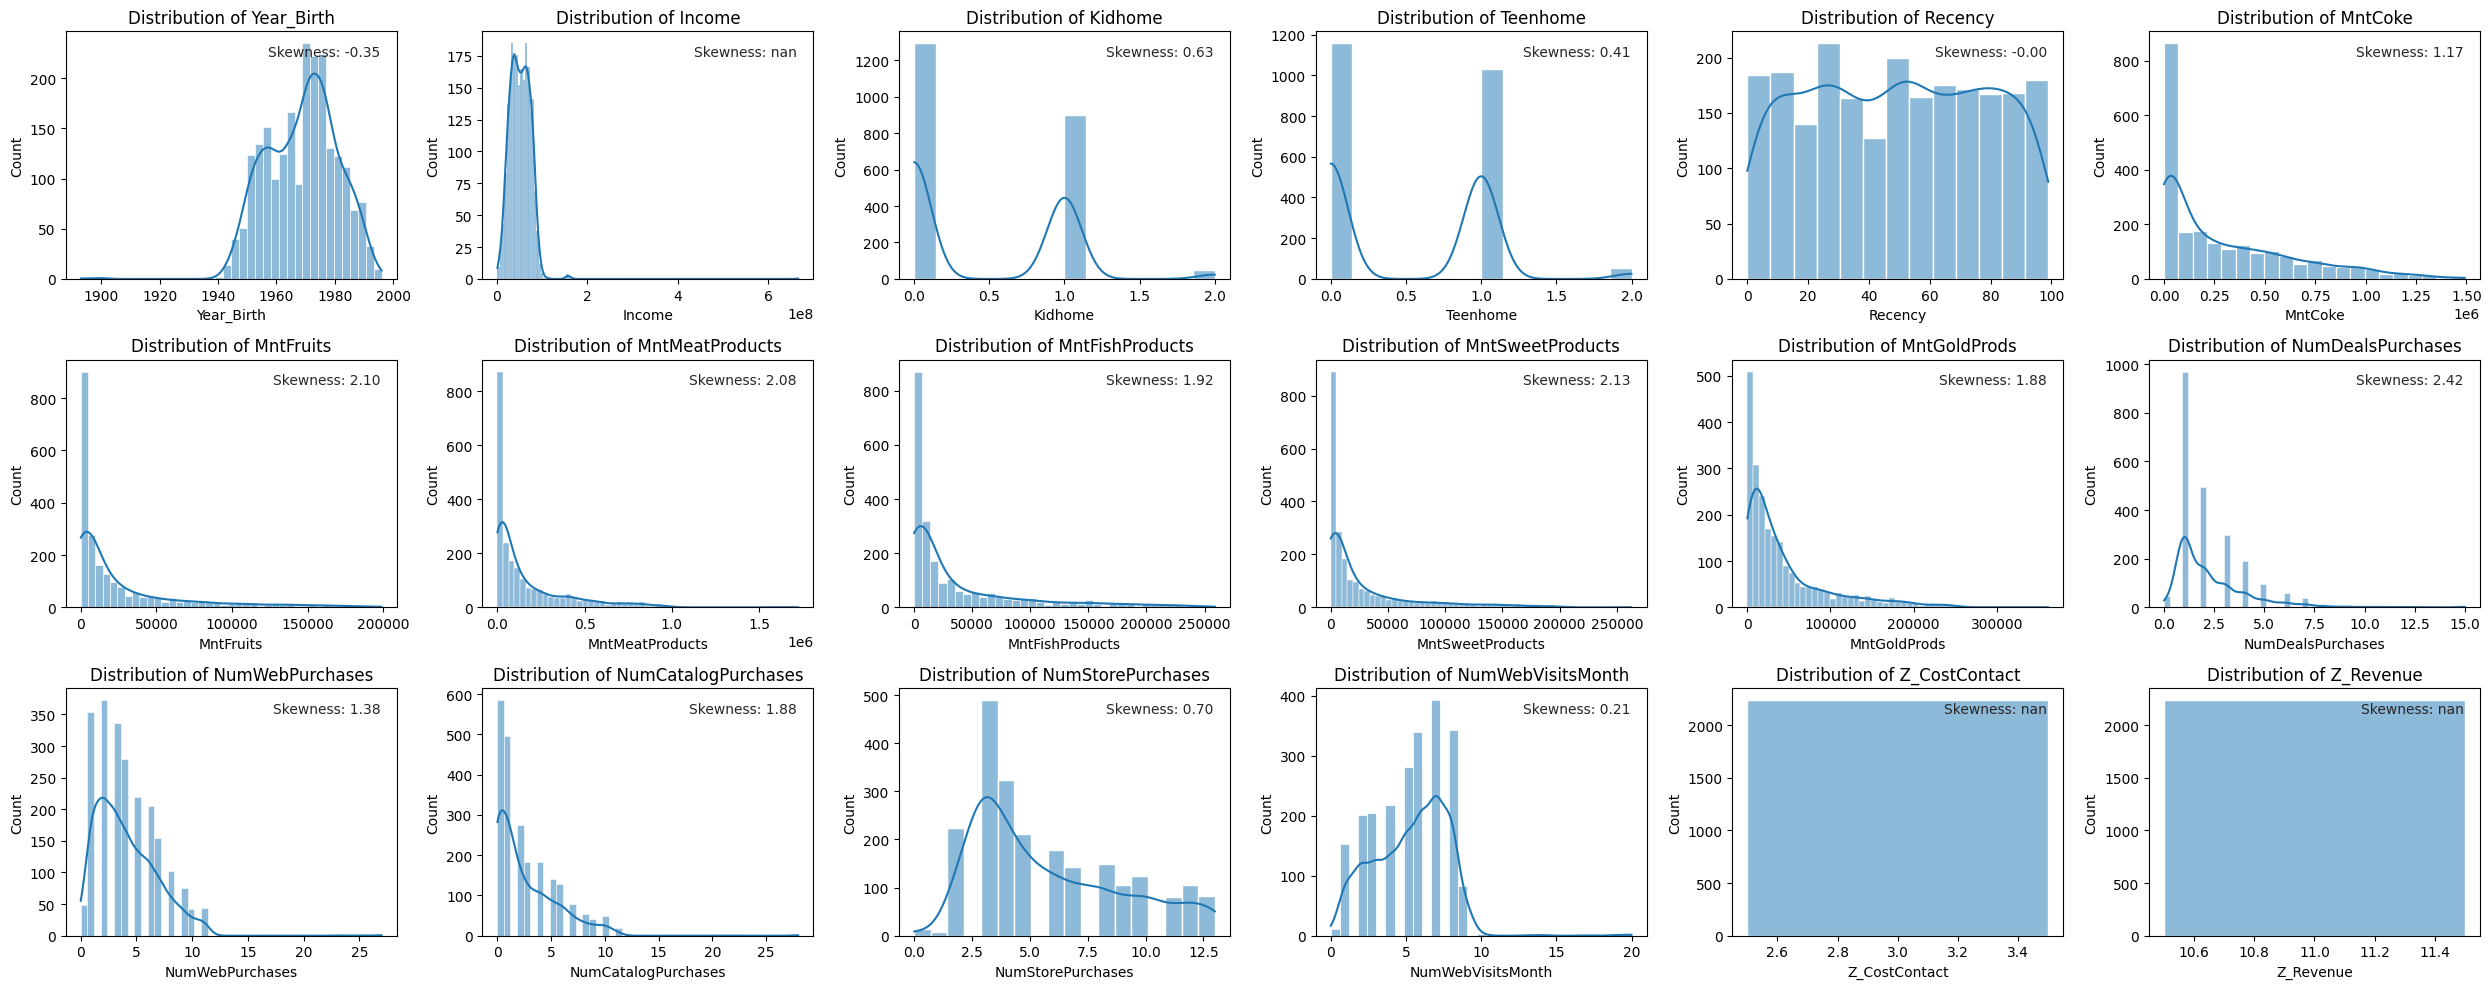

In [ ]:
def univariate_eda_numeric(df, numeric_cols):
    fig, axes = plt.subplots(3, 6, figsize=(25, 10))  # Adjust the figure size as needed
    axes = axes.flatten()

    # Using palette and style for the plot
    sns.set_palette("pastel")
    sns.set_style("whitegrid")

    for i, col in enumerate(numeric_cols):
        ax = axes[i]
        sns.histplot(df[col], ax=ax, kde=True)
        ax.set_title(f"Distribution of {col}")
        ax.set_xlabel(col)

        # Calculate skewness
        skewness = skew(df[col])
        skew_info = f"Skewness: {skewness:.2f}"
        ax.text(0.95, 0.9, skew_info, transform=ax.transAxes, ha='right')

    plt.tight_layout()
    plt.show()

# Call the function to create the distplot
univariate_eda_numeric(df, numeric_cols)

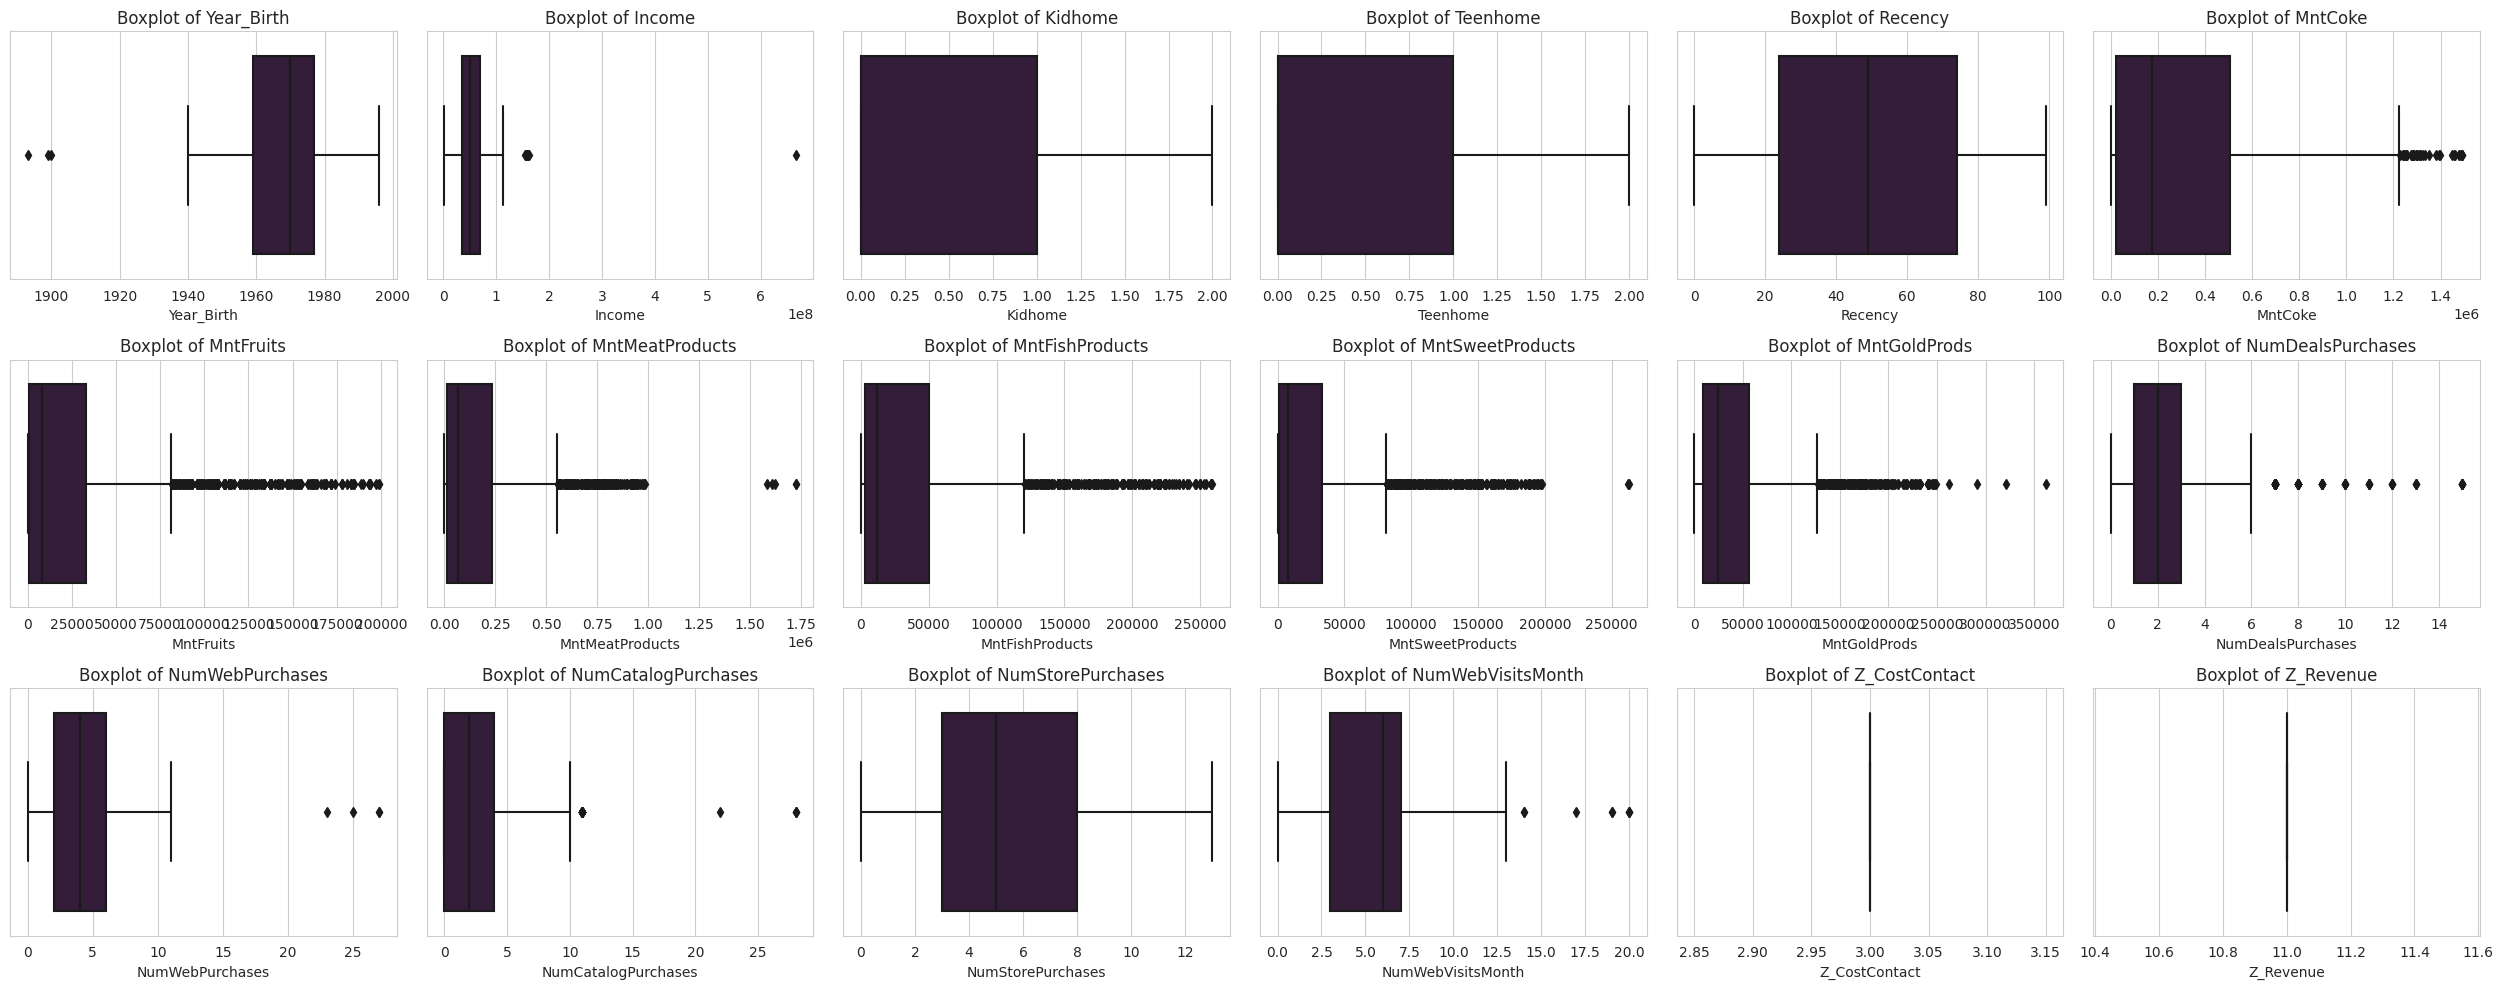

In [ ]:
def univariate_eda_numeric(df, numeric_cols):
    fig, axes = plt.subplots(3, 6, figsize=(25, 10))  # Adjust the figure size as needed
    axes = axes.flatten()

    # Using palette and style for the plot
    sns.set_palette("rocket")
    sns.set_style("whitegrid")

    for i, col in enumerate(numeric_cols):
        ax = axes[i]

        # Create a boxplot for the numeric column
        sns.boxplot(data=df, x=col, ax=ax)

        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Call the function to create the boxplots
univariate_eda_numeric(df, numeric_cols)

In [ ]:
def identify_outliers(df, numeric_cols):
    outliers_info = []

    for col in numeric_cols:
        data = df[col].dropna()  # Drop missing values

        # Calculate quartiles and IQR
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1

        # Define lower and upper bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        # Create a dictionary to store outlier information
        outlier_info = {
            'Column Name': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': len(outliers),
            'Percentage of Outliers': (len(outliers) / len(data)) * 100
        }

        outliers_info.append(outlier_info)

    # Create a DataFrame to display the outlier information
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# Call the function to identify outliers in numeric columns
outliers_df = identify_outliers(df, numeric_cols)

# Display the outlier information
outliers_df

Column Name  Lower Bound  Upper Bound  Number of Outliers  Percentage of Outliers
0            Year_Birth       1932.0       2004.0                   3                0.133929
1                Income  -14525500.0  118350500.0                   8                0.361011
2               Kidhome         -1.5          2.5                   0                0.000000
3              Teenhome         -1.5          2.5                   0                0.000000
4               Recency        -51.0        149.0                   0                0.000000
5               MntCoke    -697000.0    1225000.0                  35                1.562500
6             MntFruits     -47000.0      81000.0                 227               10.133929
7       MntMeatProducts    -308000.0     556000.0                 175                7.812500
8       MntFishProducts     -67500.0     120500.0                 223                9.955357
9      MntSweetProducts     -47000.0      81000.0                 248               11.071429
10         MntGoldProds     -61500.0     126500.0                 207                9.241071
11    NumDealsPurchases         -2.0          6.0                  86                3.839286
12      NumWebPurchases         -4.0         12.0                   4                0.178571
13  NumCatalogPurchases         -6.0         10.0                  23                1.026786
14    NumStorePurchases         -4.5         15.5                   0                0.000000
15    NumWebVisitsMonth         -3.0         13.0                   8                0.357143
16        Z_CostContact          3.0          3.0                   0                0.000000
17            Z_Revenue         11.0         11.0                   0                0.000000

Certainly! Here's a simplified summary with recommendations for the columns that need investigation due to the presence of outliers:

Outlier Investigation:

* Year_Birth: Investigate for data entry errors. Check for unusual birth year values.

* Income: Investigate extreme income values and data accuracy. Verify the correctness of income data.

* MntCoke: Investigate and consider handling extreme values. Review and assess the nature of outliers in this spending category.

* MntFruits: Investigate and consider handling extreme values. Examine the outliers in fruit spending and decide on appropriate actions.

* MntMeatProducts: Investigate and consider handling extreme values. Analyze the outliers in meat product spending and determine the next steps.

* MntFishProducts: Investigate and consider handling extreme values. Evaluate the outliers in fish product spending and plan necessary actions.

* MntSweetProducts: Investigate and consider handling extreme values. Assess the outliers in sweet product spending for potential adjustments.

* MntGoldProds: Investigate and consider handling extreme values. Investigate the outliers in gold product spending and decide on potential treatments.

* NumDealsPurchases: Investigate and consider handling extreme values. Examine outliers in the number of deals purchases and determine appropriate actions.

* NumWebPurchases: Investigate and consider handling extreme values. Review outliers in the number of web purchases and decide on necessary steps.

* NumCatalogPurchases: Investigate and consider handling extreme values. Analyze outliers in the number of catalog purchases and plan appropriate measures.

* NumWebVisitsMonth: Investigate and consider handling extreme values. Assess outliers in the number of web visits per month and decide on relevant actions.

These recommendations involve investigating the nature and potential impact of outliers in each column and taking appropriate actions based on the specific context of your analysis and data.

## Feature engineering🛠️

###conversion rate

In [ ]:
# Calculate the total number of web visits or interactions (denominator)
df['Total_Web_Visits'] = df['NumWebVisitsMonth']

# Calculate the total number of responses (numerator)
response_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Total_Responses'] = df[response_columns].sum(axis=1)

# Calculate the Conversion Rate
df['Conversion_Rate'] = df['Total_Responses'] / df['Total_Web_Visits']

# Replace potential NaN or inf values with appropriate values (e.g., 0)
df['Conversion_Rate'].replace([np.inf, -np.inf, np.nan], 0, inplace=True)

In [ ]:
df['Conversion_Rate'].unique()

array([0.14285714, 0.        , 0.11111111, 0.05      , 1.        ,
       0.2       , 0.125     , 0.5       , 0.16666667, 0.33333333,
       3.        , 2.        , 0.6       , 0.25      , 0.42857143,
       0.22222222, 0.4       , 0.75      , 0.66666667, 2.5       ,
       0.28571429, 0.8       , 1.25      , 1.5       , 0.83333333,
       1.33333333, 0.1       , 4.        , 0.375     , 5.        ,
       0.44444444, 1.66666667, 0.57142857])

###Age Group

In [ ]:
# Define age group bins and labels
age_bins = [0, 11, 16, 30, 45, float('inf')]
age_labels = ['Child', 'Teens', 'Young Adults', 'Middle Adults', 'Senior Adults']

# Calculate the age from the 'Year_Birth' column
current_year = 2023  # Assuming the current year is 2023
df['Age'] = current_year - df['Year_Birth']

# Create the "Age_Group" feature using cut with custom bins and labels
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

###Total Expenses

In [ ]:
# Create Total Expenses feature
df['Total_Expenses'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

###Total Transactions

In [ ]:
# Create Total Transactions feature
df['Total_Transactions'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']].sum(axis=1)

###Family Size

In [ ]:
# Create Family Size feature
df['Family_Size'] = df['Kidhome'] + df['Teenhome']

###Income Labels

In [ ]:
# Define custom income bins and labels based on the unique values
income_bins = [0, 30000000, 50000000, 70000000, 75000000]  # Adjust the bin edges as needed
income_labels = ['Low Income', 'Moderate Income', 'High Income', 'Very High Income']

# Create the "Income Level" feature using cut with custom bins and labels
df['Income_Level'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

###Recency Types

In [ ]:
# Define custom recency bins and labels
recency_bins = [0, 30, 60, 90, 100]  # Adjust the bin edges as needed
recency_labels = ['Recent', 'Moderate', 'Less Recent', 'Inactive']

df['Recency_Group'] = pd.cut(df['Recency'], bins=recency_bins, labels=recency_labels)

###combined all the accepted campaign

In [ ]:
# List of columns to combine
accepted_cmp_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create a new column 'Total_Accepted_Cmp' that sums the values in the specified columns
df['Total_Accepted'] = df[accepted_cmp_columns].sum(axis=1)

In [ ]:
#checking the data after feature engineering
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0         0   
1           1  2174        1954        S1         Lajang  46344000.0        1         1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0         0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1         0   
4           4  5324        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  04-09-2012       58   635000      88000           546000           172000             88000   
1  08-03-2014       38    11000       1000             6000             2000              1000   
2  21-08-2013       26   426000      49000           127000           111000             21000   
3  10-02-2014       26    11000       4000            20000            10000              3000   
4  19-01-2014       94   173000      43000           118000            46000             27000   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0         88000                  3                8                   10                  4   
1          6000                  2                1                    1                  2   
2         42000                  1                8                    2                 10   
3          5000                  2                2                    0                  4   
4         15000                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                  7             0             0             0             0             0   
1                  5             0             0             0             0             0   
2                  4             0             0             0             0             0   
3                  6             0             0             0             0             0   
4                  5             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue  Response  Total_Web_Visits  Total_Responses  \
0         0              3         11         1                 7                1   
1         0              3         11         0                 5                0   
2         0              3         11         0                 4                0   
3         0              3         11         0                 6                0   
4         0              3         11         0                 5                0   

   Conversion_Rate  Age      Age_Group  Total_Expenses  Total_Transactions  Family_Size  \
0         0.142857   66  Senior Adults         1617000                  25            0   
1         0.000000   69  Senior Adults           27000                   6            2   
2         0.000000   58  Senior Adults          776000                  21            0   
3         0.000000   39  Middle Adults           53000                   8            1   
4         0.000000   42  Middle Adults          422000                  19            1   

       Income_Level Recency_Group  Total_Accepted  
0       High Income      Moderate               0  
1   Moderate Income      Moderate               0  
2  Very High Income        Recent               0  
3        Low Income        Recent               0  
4       High Income      Inactive               0

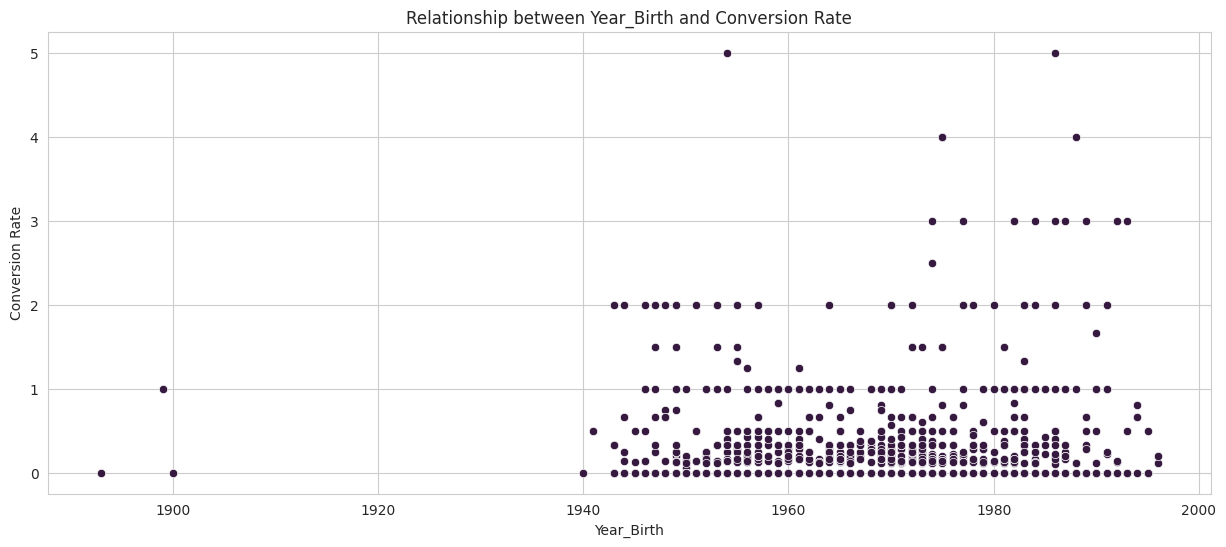

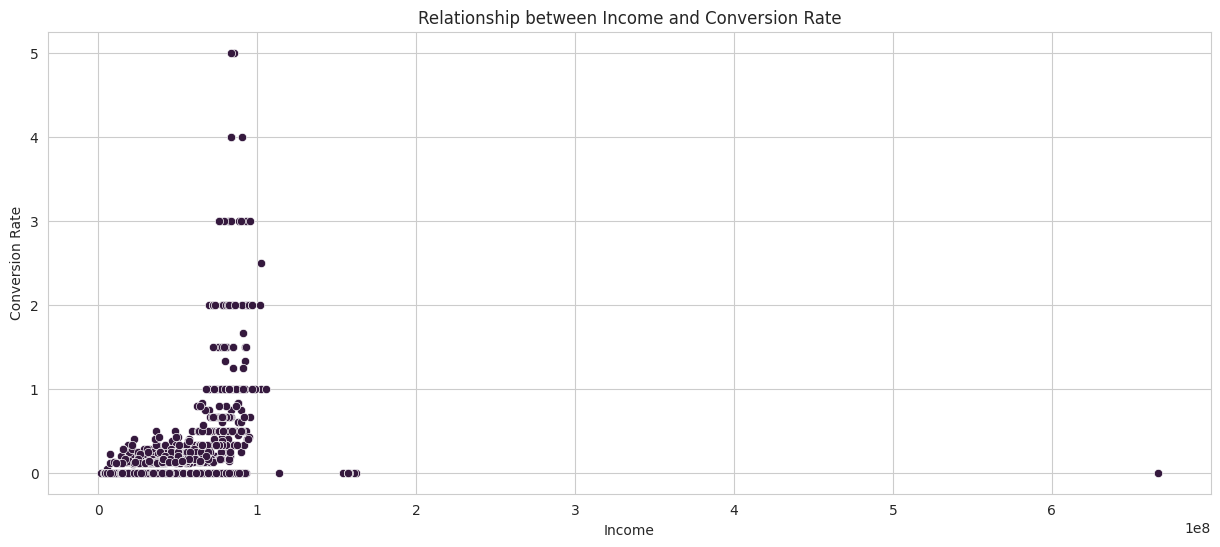

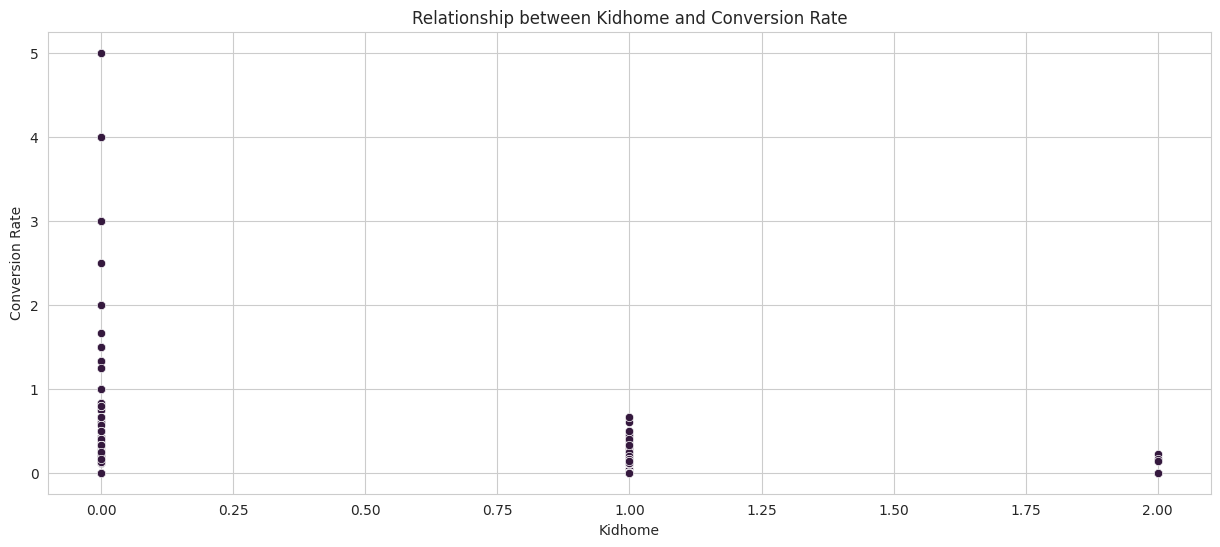

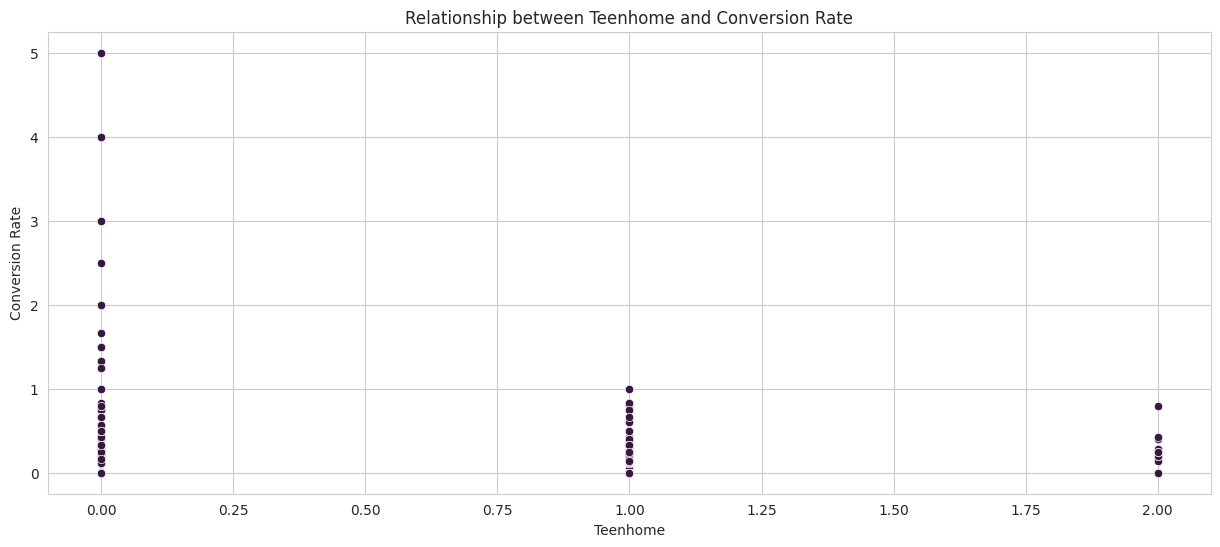

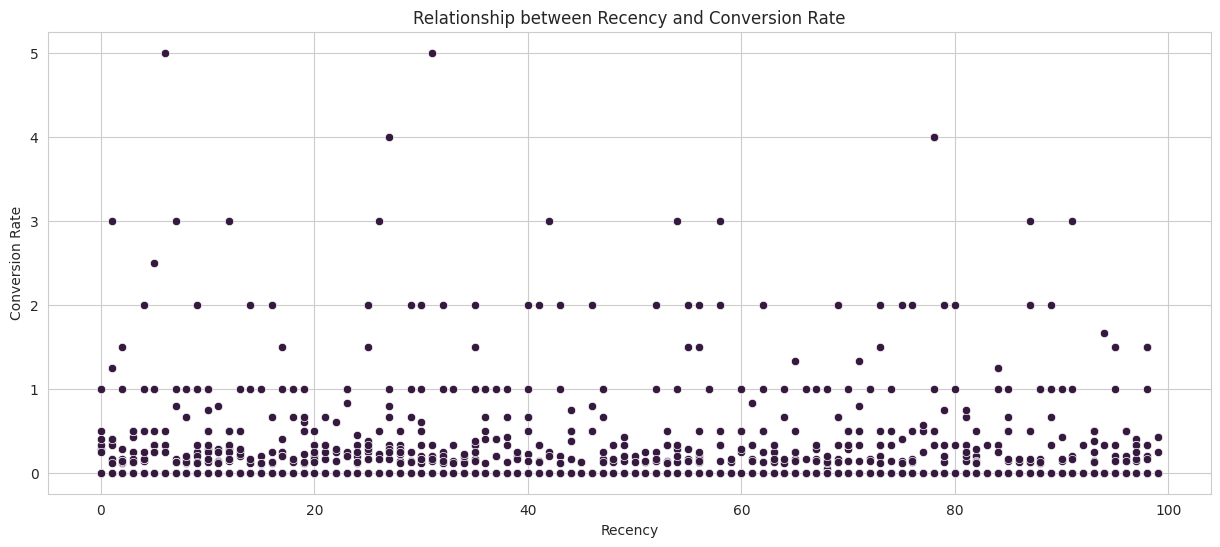

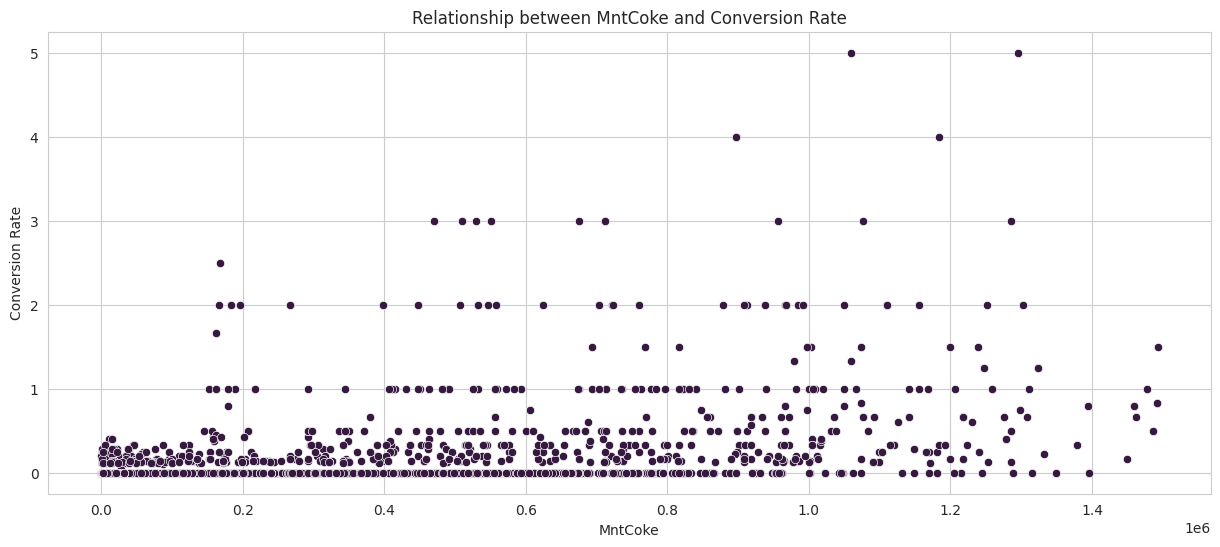

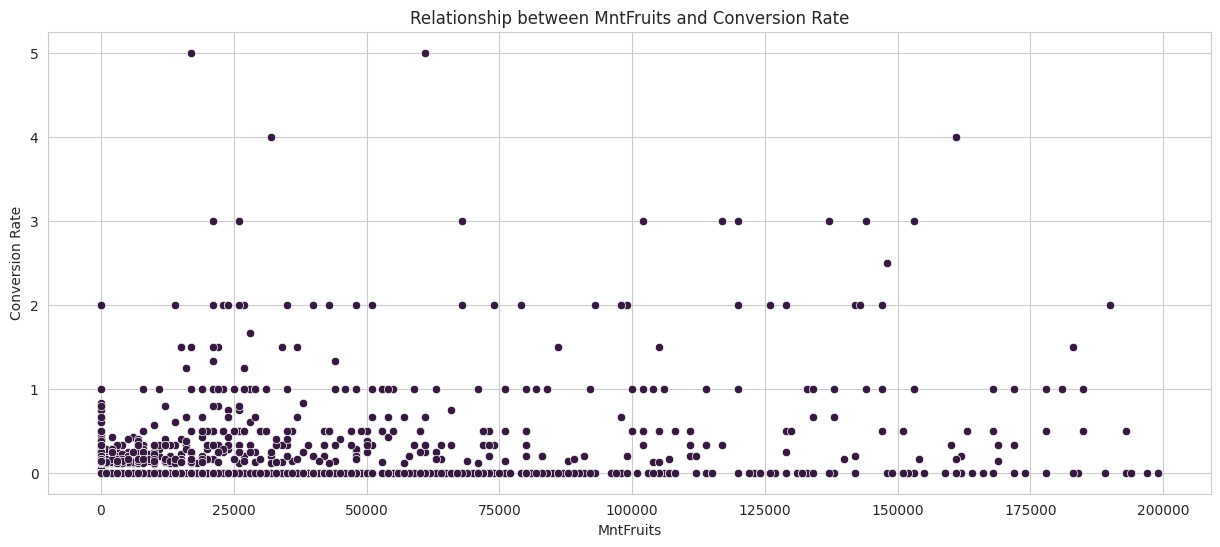

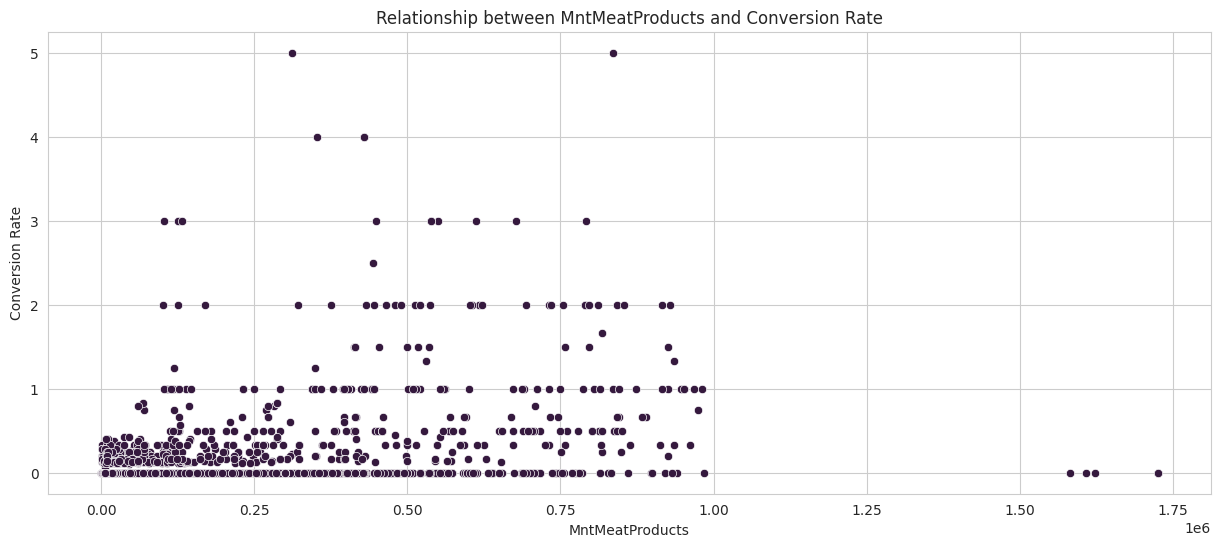

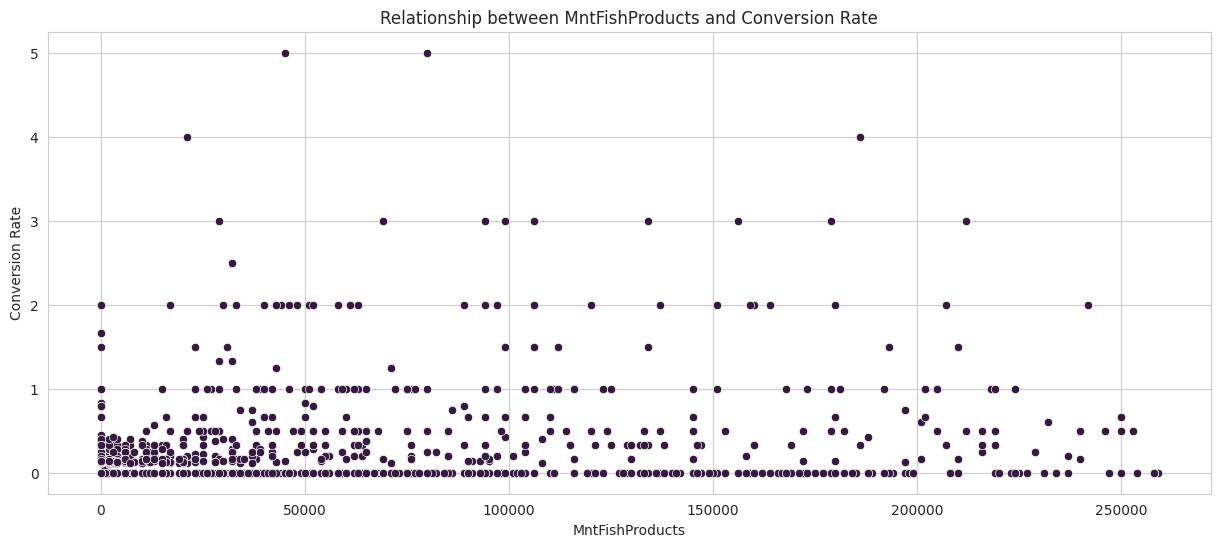

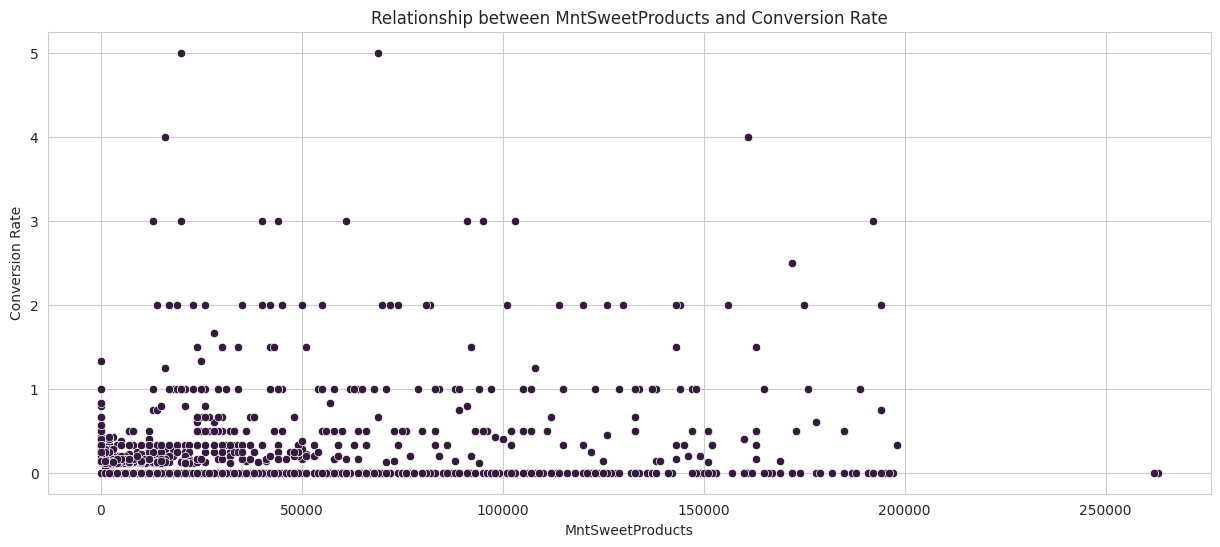

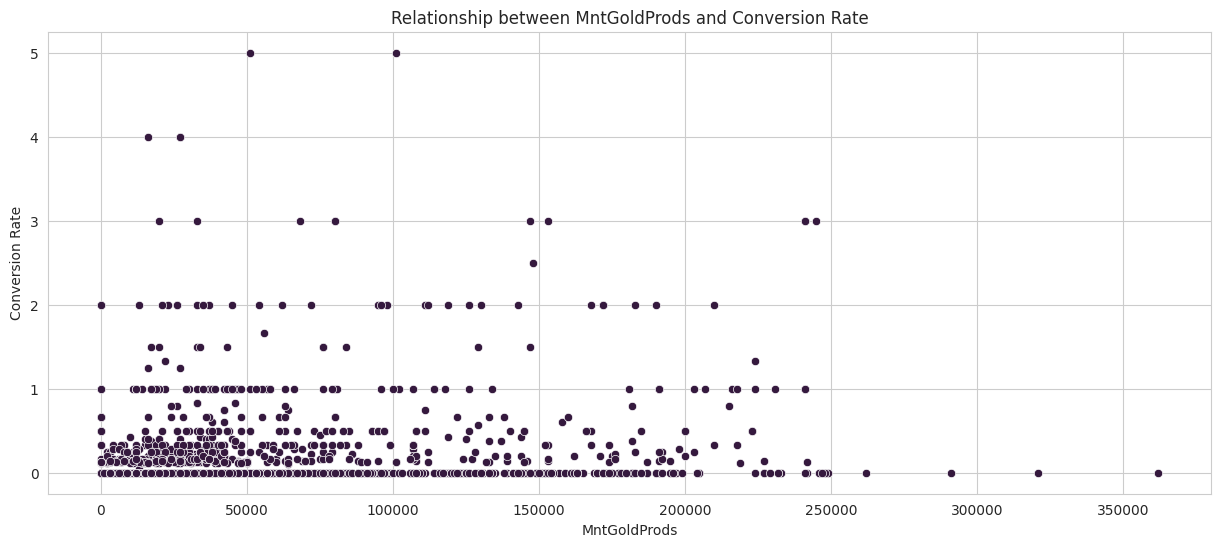

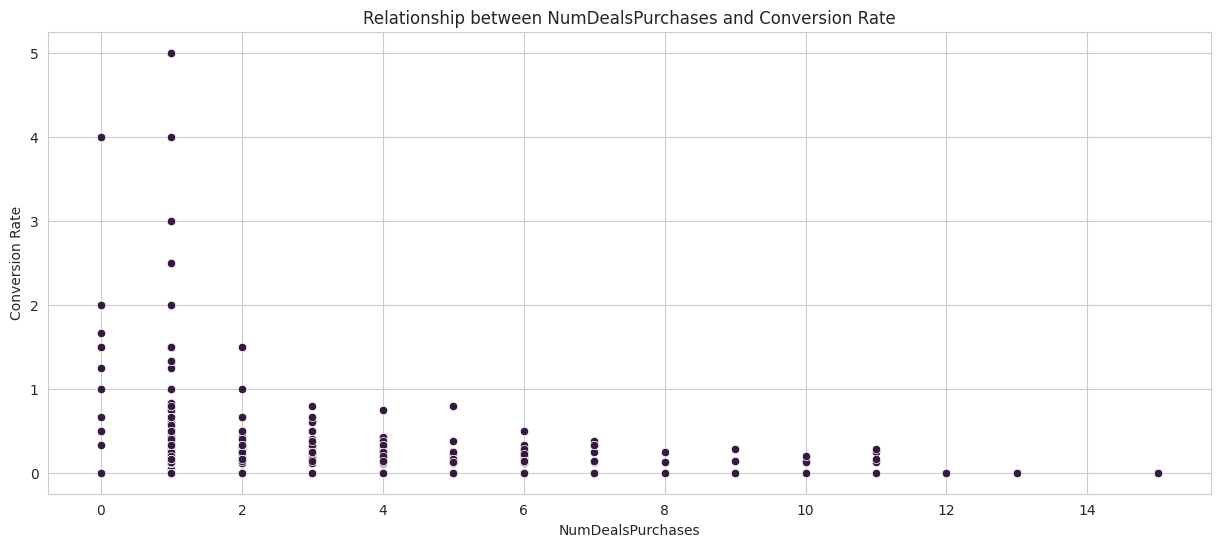

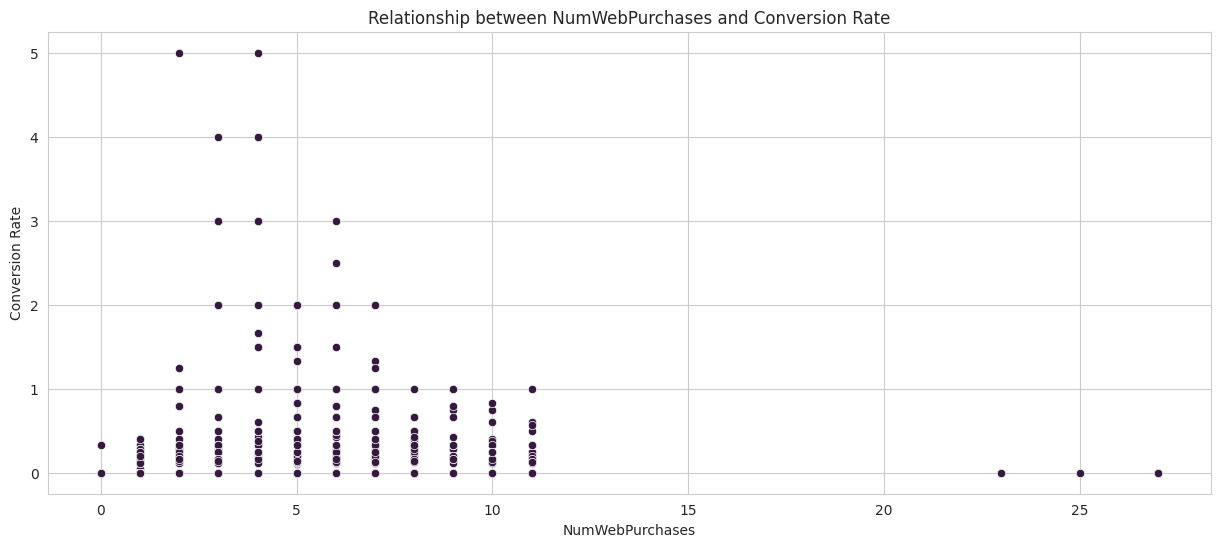

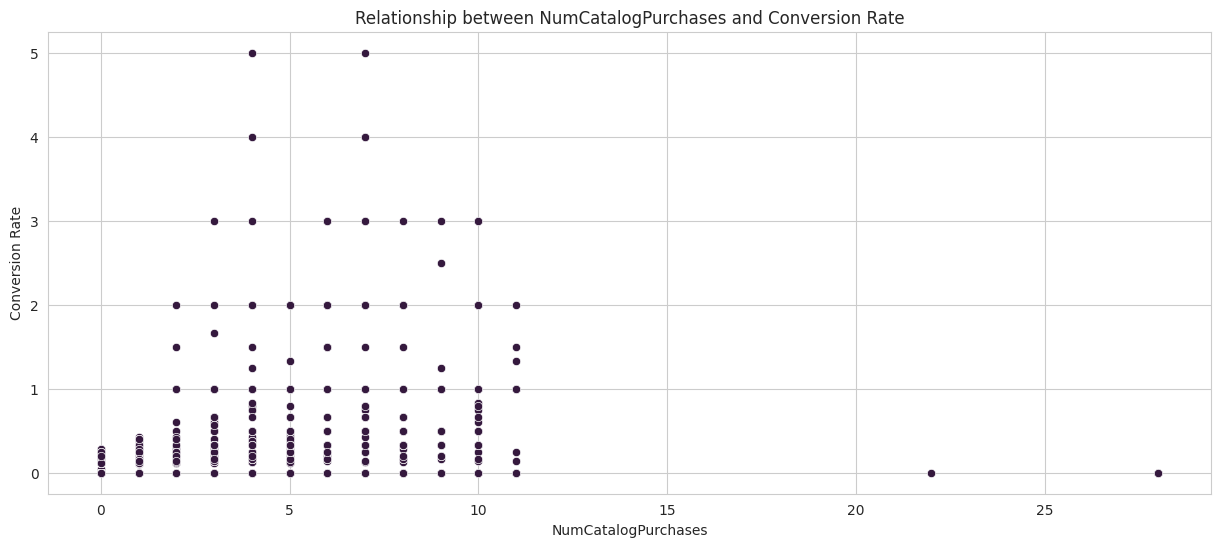

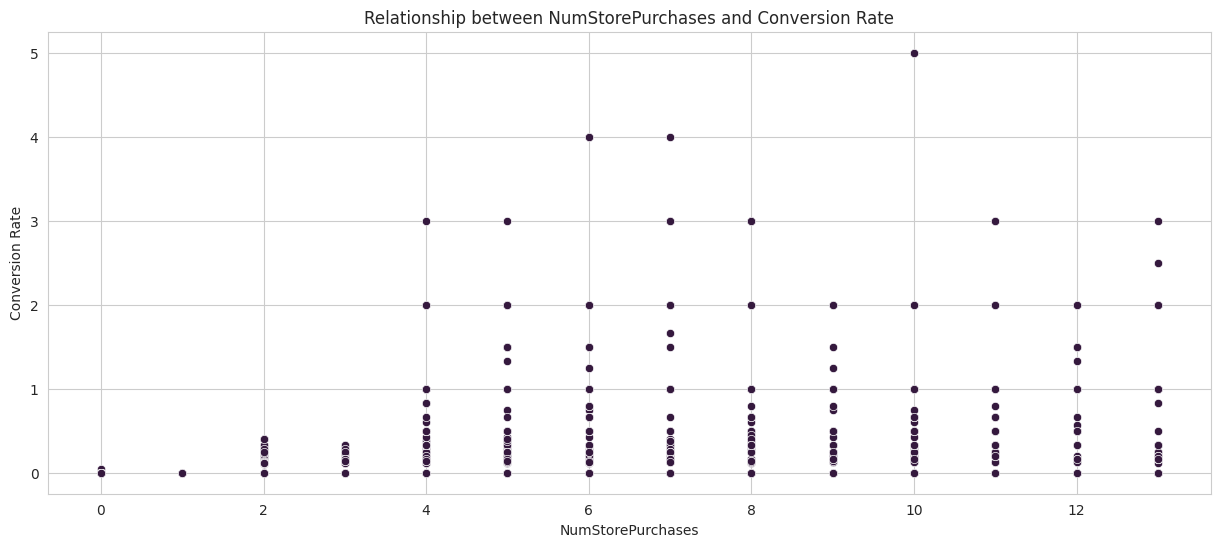

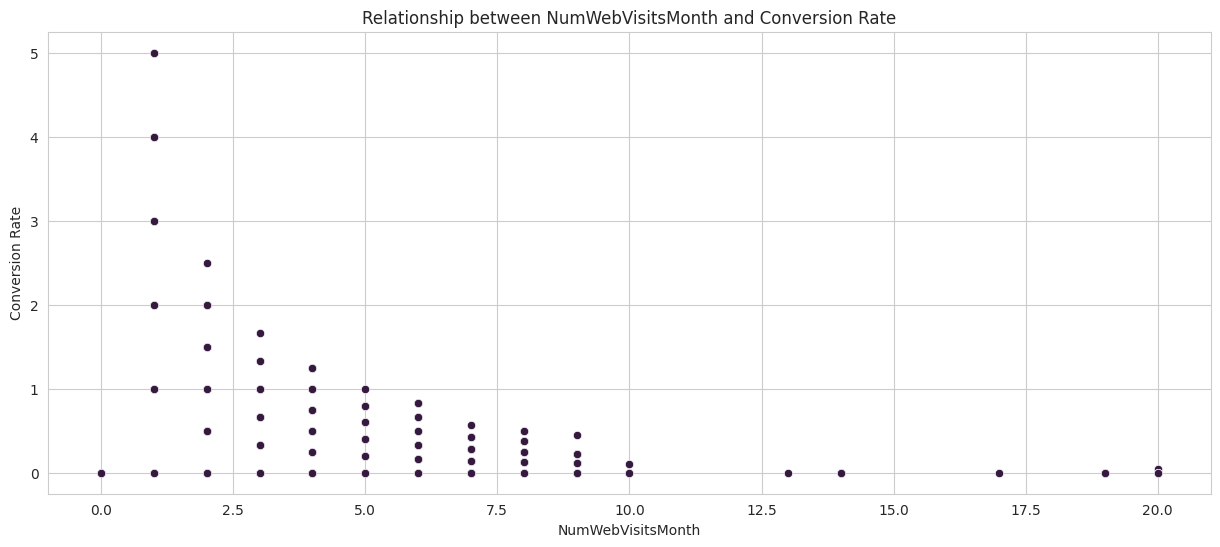

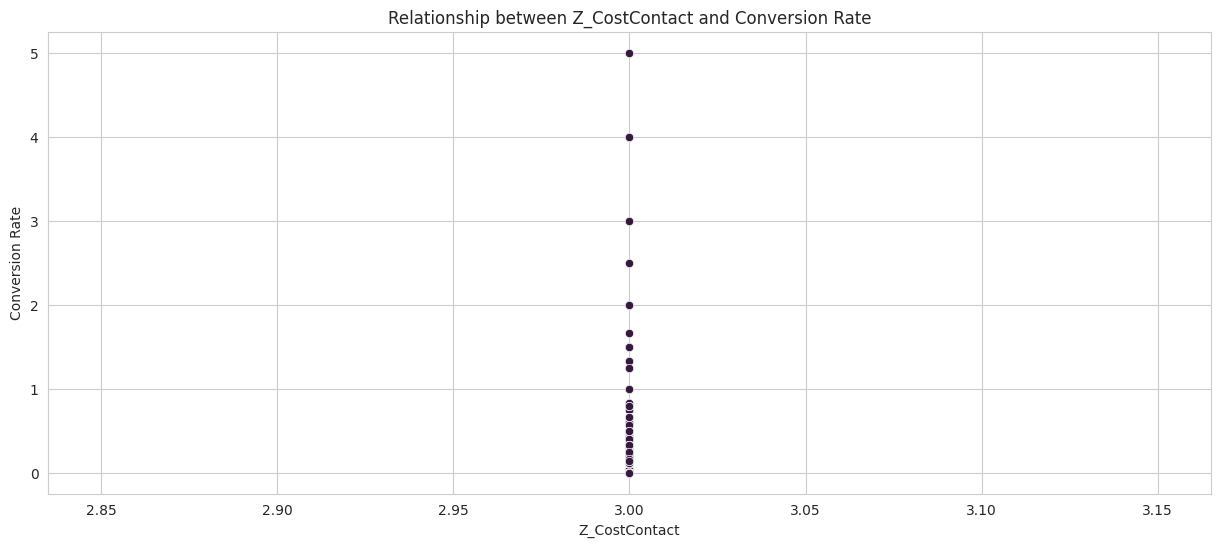

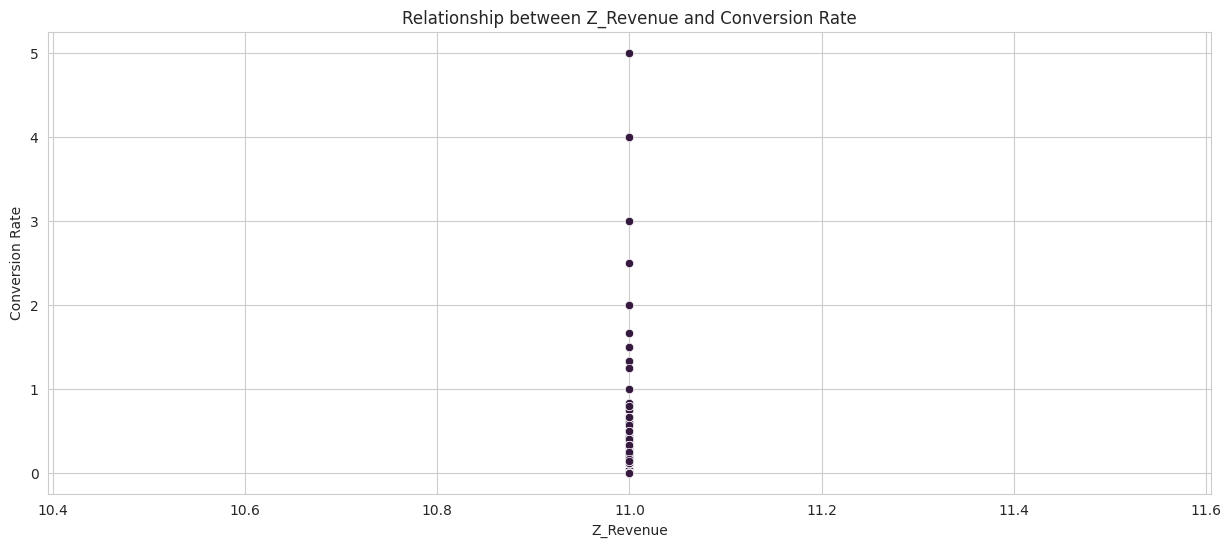

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(15, 6))
    sns.scatterplot(x=col, y='Conversion_Rate', data=df)
    plt.title(f'Relationship between {col} and Conversion Rate')
    plt.xlabel(col)
    plt.ylabel('Conversion Rate')
    plt.show()

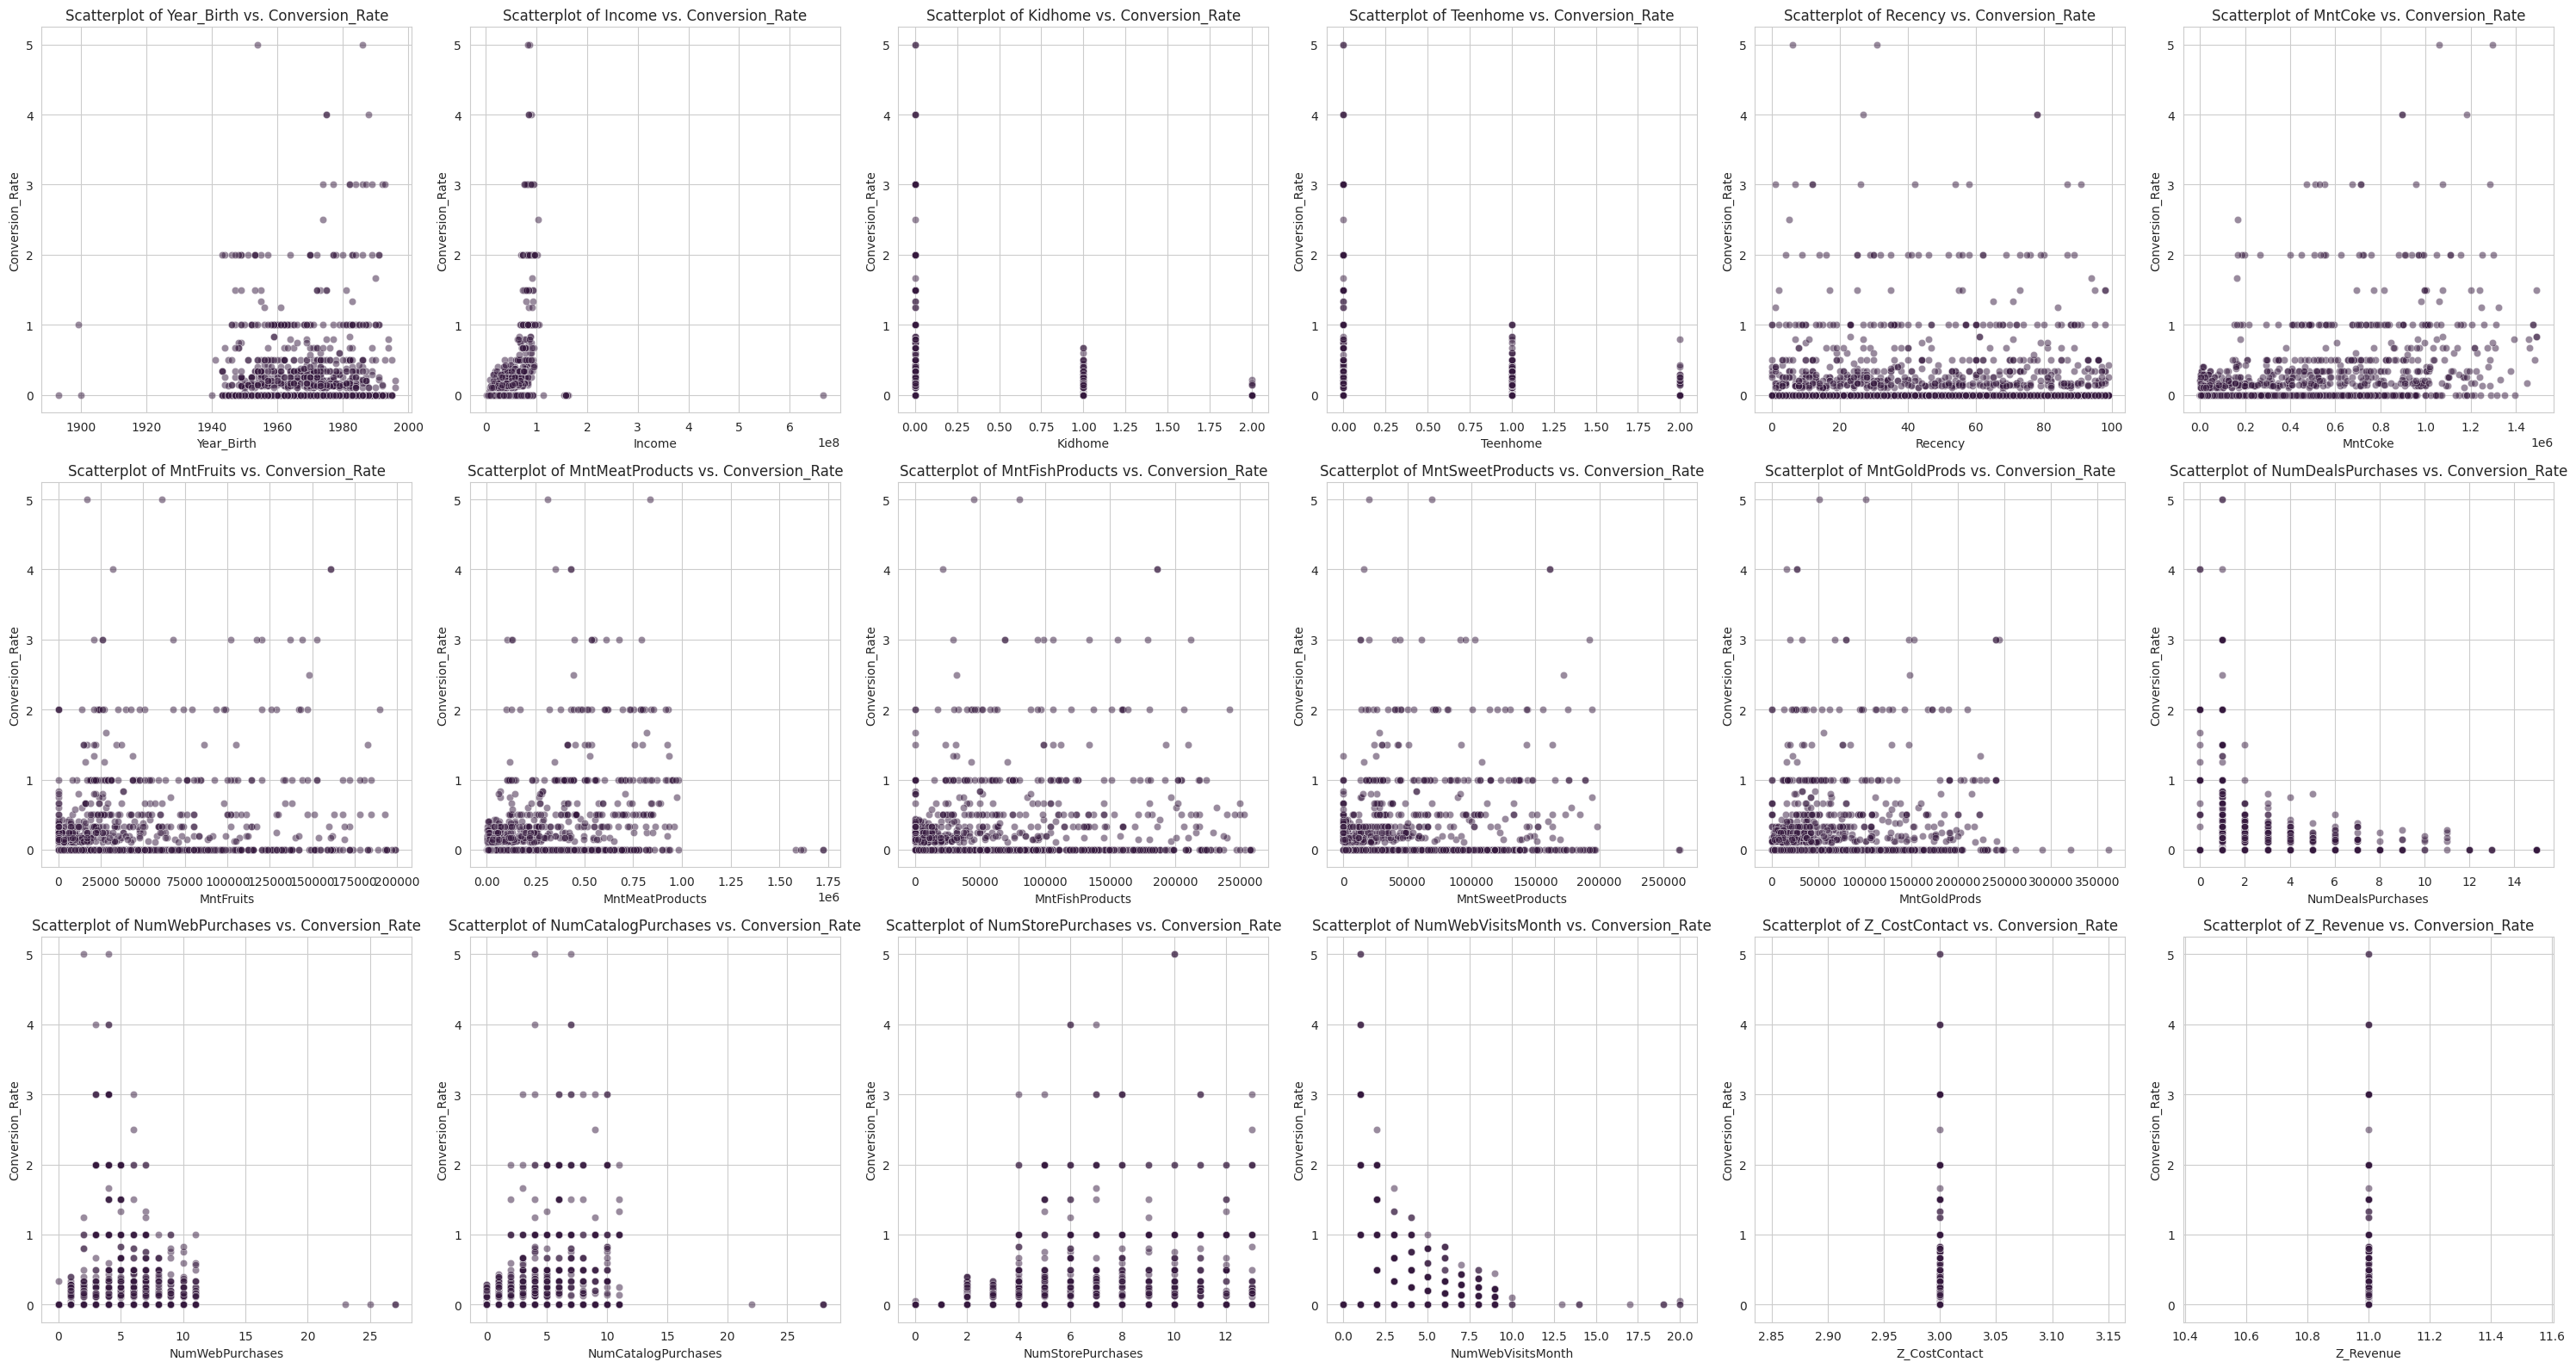

In [ ]:
# Create subplots for scatterplots
fig, axes = plt.subplots(3, 6, figsize=(30, 16))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.scatterplot(data=df, x=col, y='Conversion_Rate', ax=axes[i], alpha=0.5)
    axes[i].set_title(f'Scatterplot of {col} vs. Conversion_Rate')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Conversion_Rate')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

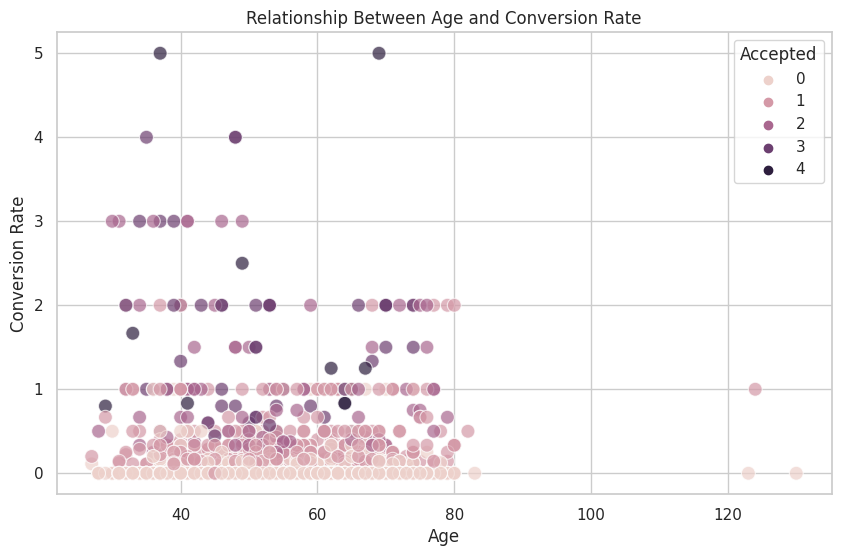

In [ ]:
# Set the style and palette
sns.set(style="whitegrid", palette="colorblind")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Conversion_Rate', hue='Total_Accepted', data=df, marker='o', s=100, alpha=0.7)

# Set plot labels and title
plt.xlabel('Age')
plt.ylabel('Conversion Rate')
plt.title('Relationship Between Age and Conversion Rate')

# Add a legend
plt.legend(title='Accepted', loc='upper right')

# Show the plot
plt.show()

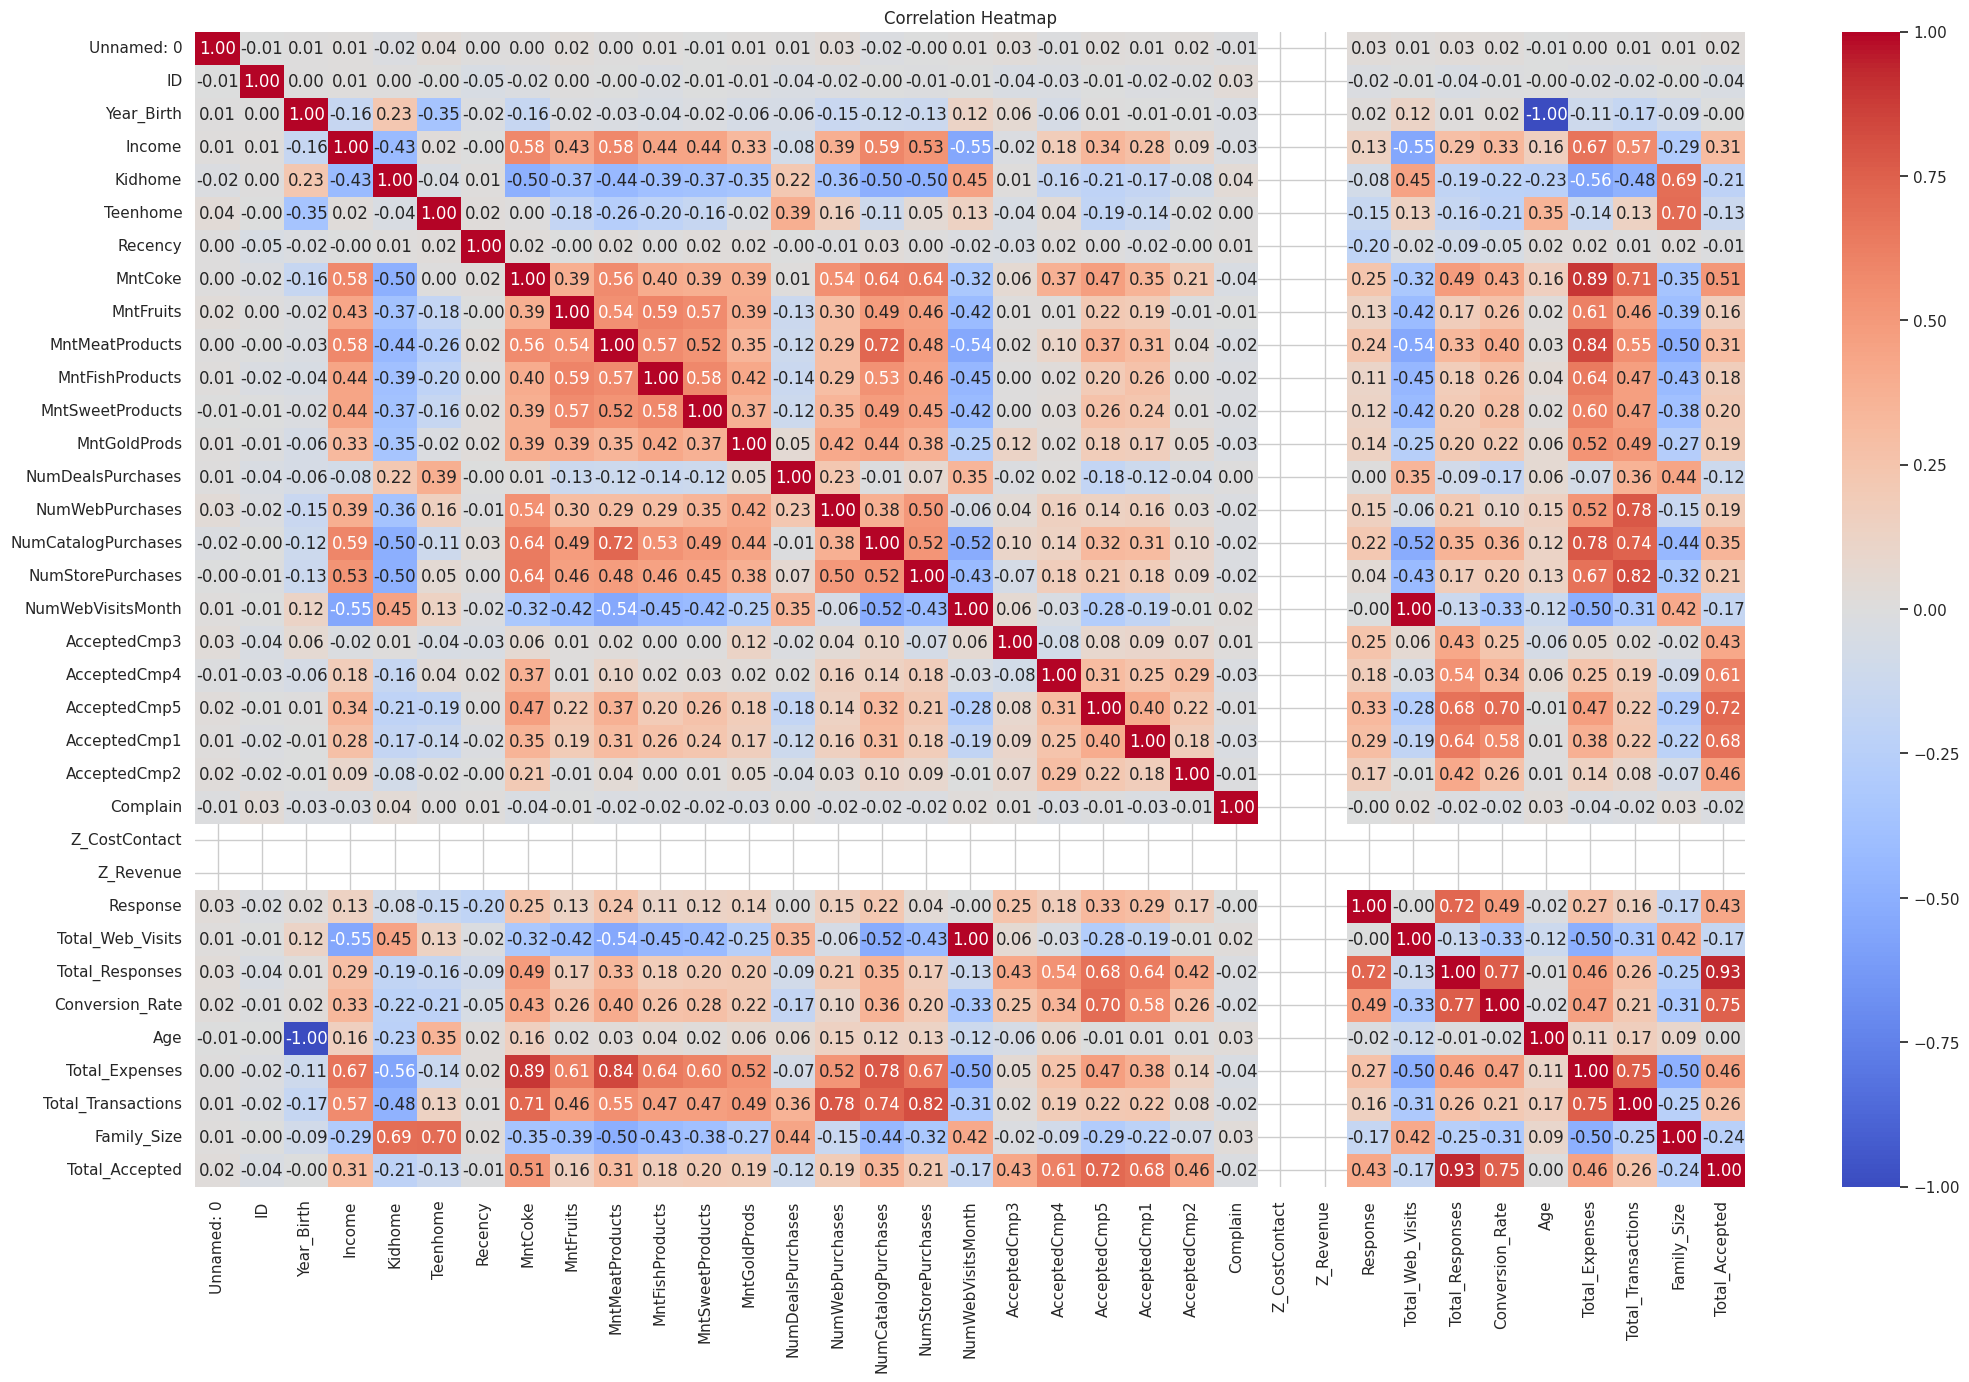

In [ ]:
# Calculate the correlation matrix for all columns
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Calculate the correlation with "Conversion_Rate"
corr = df.corrwith(df["Conversion_Rate"])

# Create a DataFrame to display the results
corr_df = pd.DataFrame({'Column': corr.index, 'Correlation': corr.values})

# Sort the DataFrame by absolute correlation value
corr_df['Correlation'] = corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by='Correlation', ascending=False).reset_index(drop=True)

# Add a column to indicate positive or negative correlation
corr_df['Correlation_Type'] = corr_df['Correlation'].apply(lambda x: 'Positive' if x >= 0 else 'Negative')

# Rename columns
corr_df.columns = ['Column', 'Correlation', 'Correlation_Type']

# Display the DataFrame
corr_df

Column  Correlation Correlation_Type
0       Conversion_Rate     1.000000         Positive
1       Total_Responses     0.765550         Positive
2        Total_Accepted     0.749912         Positive
3          AcceptedCmp5     0.699718         Positive
4          AcceptedCmp1     0.577185         Positive
5              Response     0.485666         Positive
6        Total_Expenses     0.468500         Positive
7               MntCoke     0.426877         Positive
8       MntMeatProducts     0.402560         Positive
9   NumCatalogPurchases     0.357384         Positive
10         AcceptedCmp4     0.344968         Positive
11    NumWebVisitsMonth     0.334482         Positive
12     Total_Web_Visits     0.334482         Positive
13               Income     0.330205         Positive
14          Family_Size     0.312645         Positive
15     MntSweetProducts     0.278594         Positive
16            MntFruits     0.264794         Positive
17      MntFishProducts     0.260880         Positive
18         AcceptedCmp2     0.260842         Positive
19         AcceptedCmp3     0.249077         Positive
20              Kidhome     0.220701         Positive
21         MntGoldProds     0.216993         Positive
22             Teenhome     0.213433         Positive
23   Total_Transactions     0.211924         Positive
24    NumStorePurchases     0.200059         Positive
25    NumDealsPurchases     0.173786         Positive
26      NumWebPurchases     0.096347         Positive
27              Recency     0.047095         Positive
28             Complain     0.024578         Positive
29           Unnamed: 0     0.016941         Positive
30                  Age     0.016664         Positive
31           Year_Birth     0.016664         Positive
32                   ID     0.014896         Positive
33        Z_CostContact          NaN         Negative
34            Z_Revenue          NaN         Negative

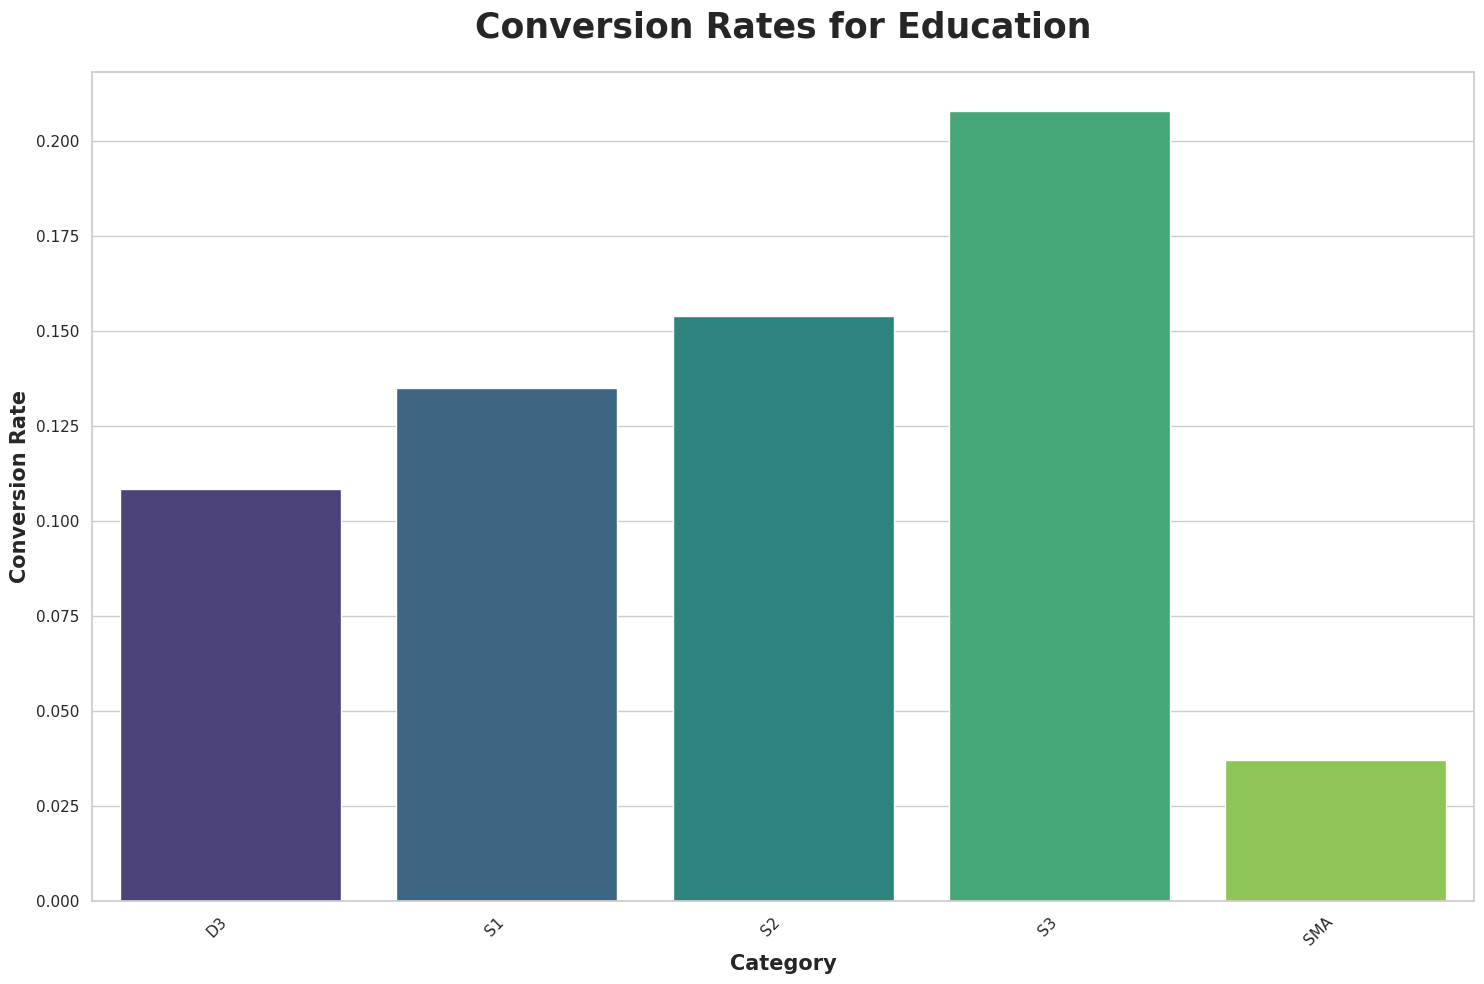

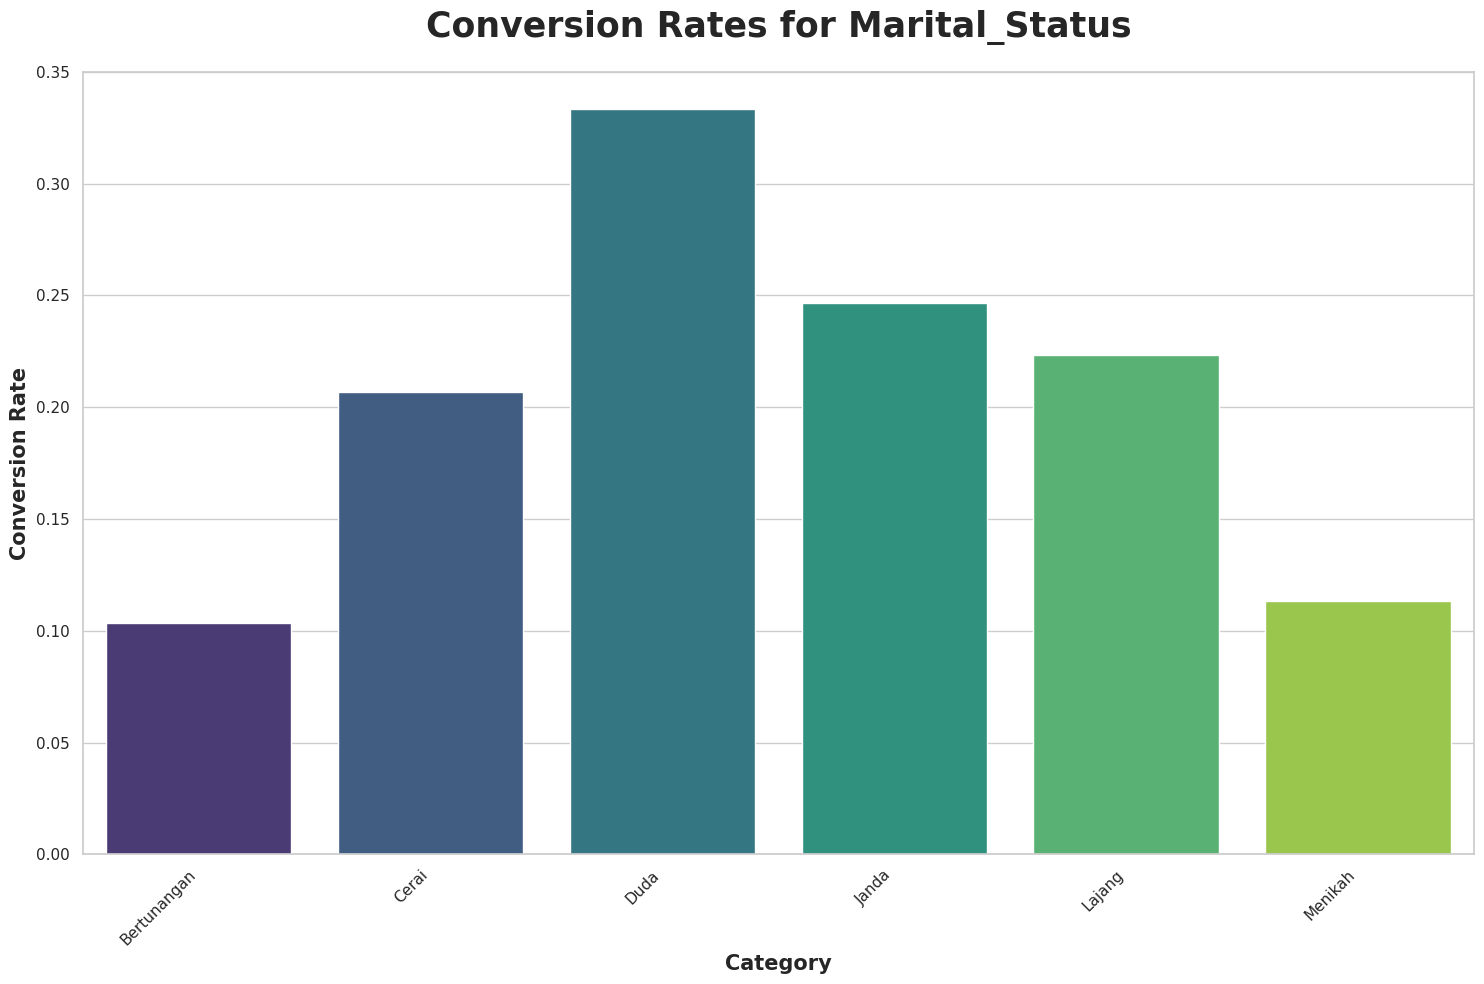

In [ ]:
# Select the categorical columns for analysis
categorical_cols = ['Education', 'Marital_Status']

# Iterate through each categorical column and create separate plots
for col in categorical_cols:
    # Group the data by the categorical column and calculate the conversion rate
    grouped = df.groupby(col)['Response'].mean().reset_index()
    grouped.columns = ['Category', 'Conversion_Rate']

    # Create a barplot for the current categorical column
    plt.figure(figsize=(15, 10))
    sns.barplot(x='Category', y='Conversion_Rate', data=grouped, palette='viridis')
    plt.title(f'Conversion Rates for {col}',  fontsize= 25, fontweight= 'bold', pad = 25)
    plt.xlabel('Category', fontsize= 15, fontweight= 'bold')
    plt.ylabel('Conversion Rate', fontsize= 15, fontweight= 'bold')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

##Data Cleaning/Preprocessing

for this step of course we can't forget to check and clear the dataset such like checking the NULL data, Duplicate data, incorrect values, etc.

###overcoming the null data


In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Summary of missing values and duplicated rows
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
Income            24
Income_Level     383
Recency_Group     28
dtype: int64


as we know from the data we can see there are some null columns, so let's check up the distribution and the skewness of the data so that we can fill in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2240 non-null   int64   
 1   ID                   2240 non-null   int64   
 2   Year_Birth           2240 non-null   int64   
 3   Education            2240 non-null   object  
 4   Marital_Status       2240 non-null   object  
 5   Income               2216 non-null   float64 
 6   Kidhome              2240 non-null   int64   
 7   Teenhome             2240 non-null   int64   
 8   Dt_Customer          2240 non-null   object  
 9   Recency              2240 non-null   int64   
 10  MntCoke              2240 non-null   int64   
 11  MntFruits            2240 non-null   int64   
 12  MntMeatProducts      2240 non-null   int64   
 13  MntFishProducts      2240 non-null   int64   
 14  MntSweetProducts     2240 non-null   int64   
 15  MntGoldProds         

###correcting the data types with a missing values

In [ ]:
# Convert 'Income_Level' and 'Recency_Group' to string, fill missing values, and then convert it back to categorical
df['Income_Level'] = df['Income_Level'].astype(str)
df['Recency_Group'] = df['Recency_Group'].astype(str)

###Filling the missing values

it's time to filling the missing values start from the income, let's check the Distribution of income column before and after

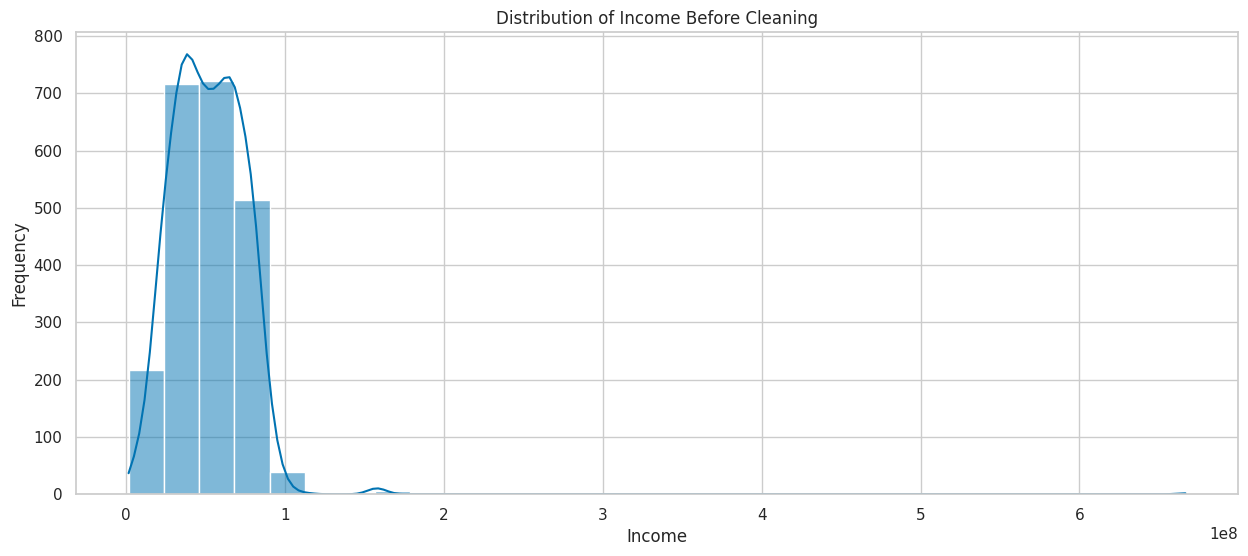

Skewness of Income: nan


In [ ]:
# Set the style for the plot
sns.set_style("whitegrid")

# Plot a histogram of the "Income" column
plt.figure(figsize=(15, 6))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title("Distribution of Income Before Cleaning")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness
income_skewness = skew(df['Income'])
print(f"Skewness of Income: {income_skewness:.2f}")

In [ ]:
df.dropna(subset=['Income'], inplace=True)

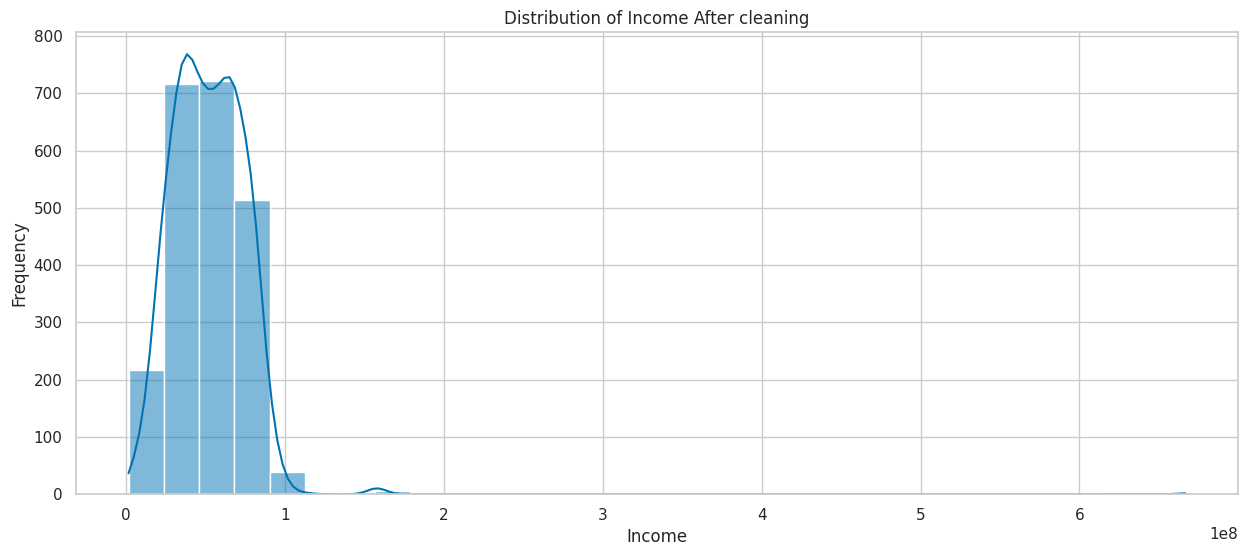

Skewness of Income: 6.76


In [ ]:
# Set the style for the plot
sns.set_style("whitegrid")

# Plot a histogram of the "Income" column
plt.figure(figsize=(15, 6))
sns.histplot(df['Income'], kde=True, bins=30)
plt.title("Distribution of Income After cleaning")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Calculate skewness
income_skewness = skew(df['Income'])
print(f"Skewness of Income: {income_skewness:.2f}")

next is the recency and income columns, since it's categorical columns let's just fill it with 'Unknown' values

In [ ]:
# Fill missing values in 'Recency' and 'Income_Level' columns with 'Unknown'
df['Recency_Group'].fillna('Unknown', inplace=True)
df['Income_Level'].fillna('Unknown', inplace=True)

###Checking the duplicate data

In [ ]:
# Check for duplicated rows in the DataFrame
duplicated_rows = df[df.duplicated()]

# Display the duplicated rows, if any
if not duplicated_rows.empty:
    print("Duplicated Rows:")
    print(duplicated_rows.head())
else:
    print("No duplicated rows found in the DataFrame.")

No duplicated rows found in the DataFrame.


it looks like there was no duplicated data has been found on this data

###removing the unnescessary columns

In [ ]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue']
df_cleaned = df.drop(columns=columns_to_drop)

###Checking the Outlier

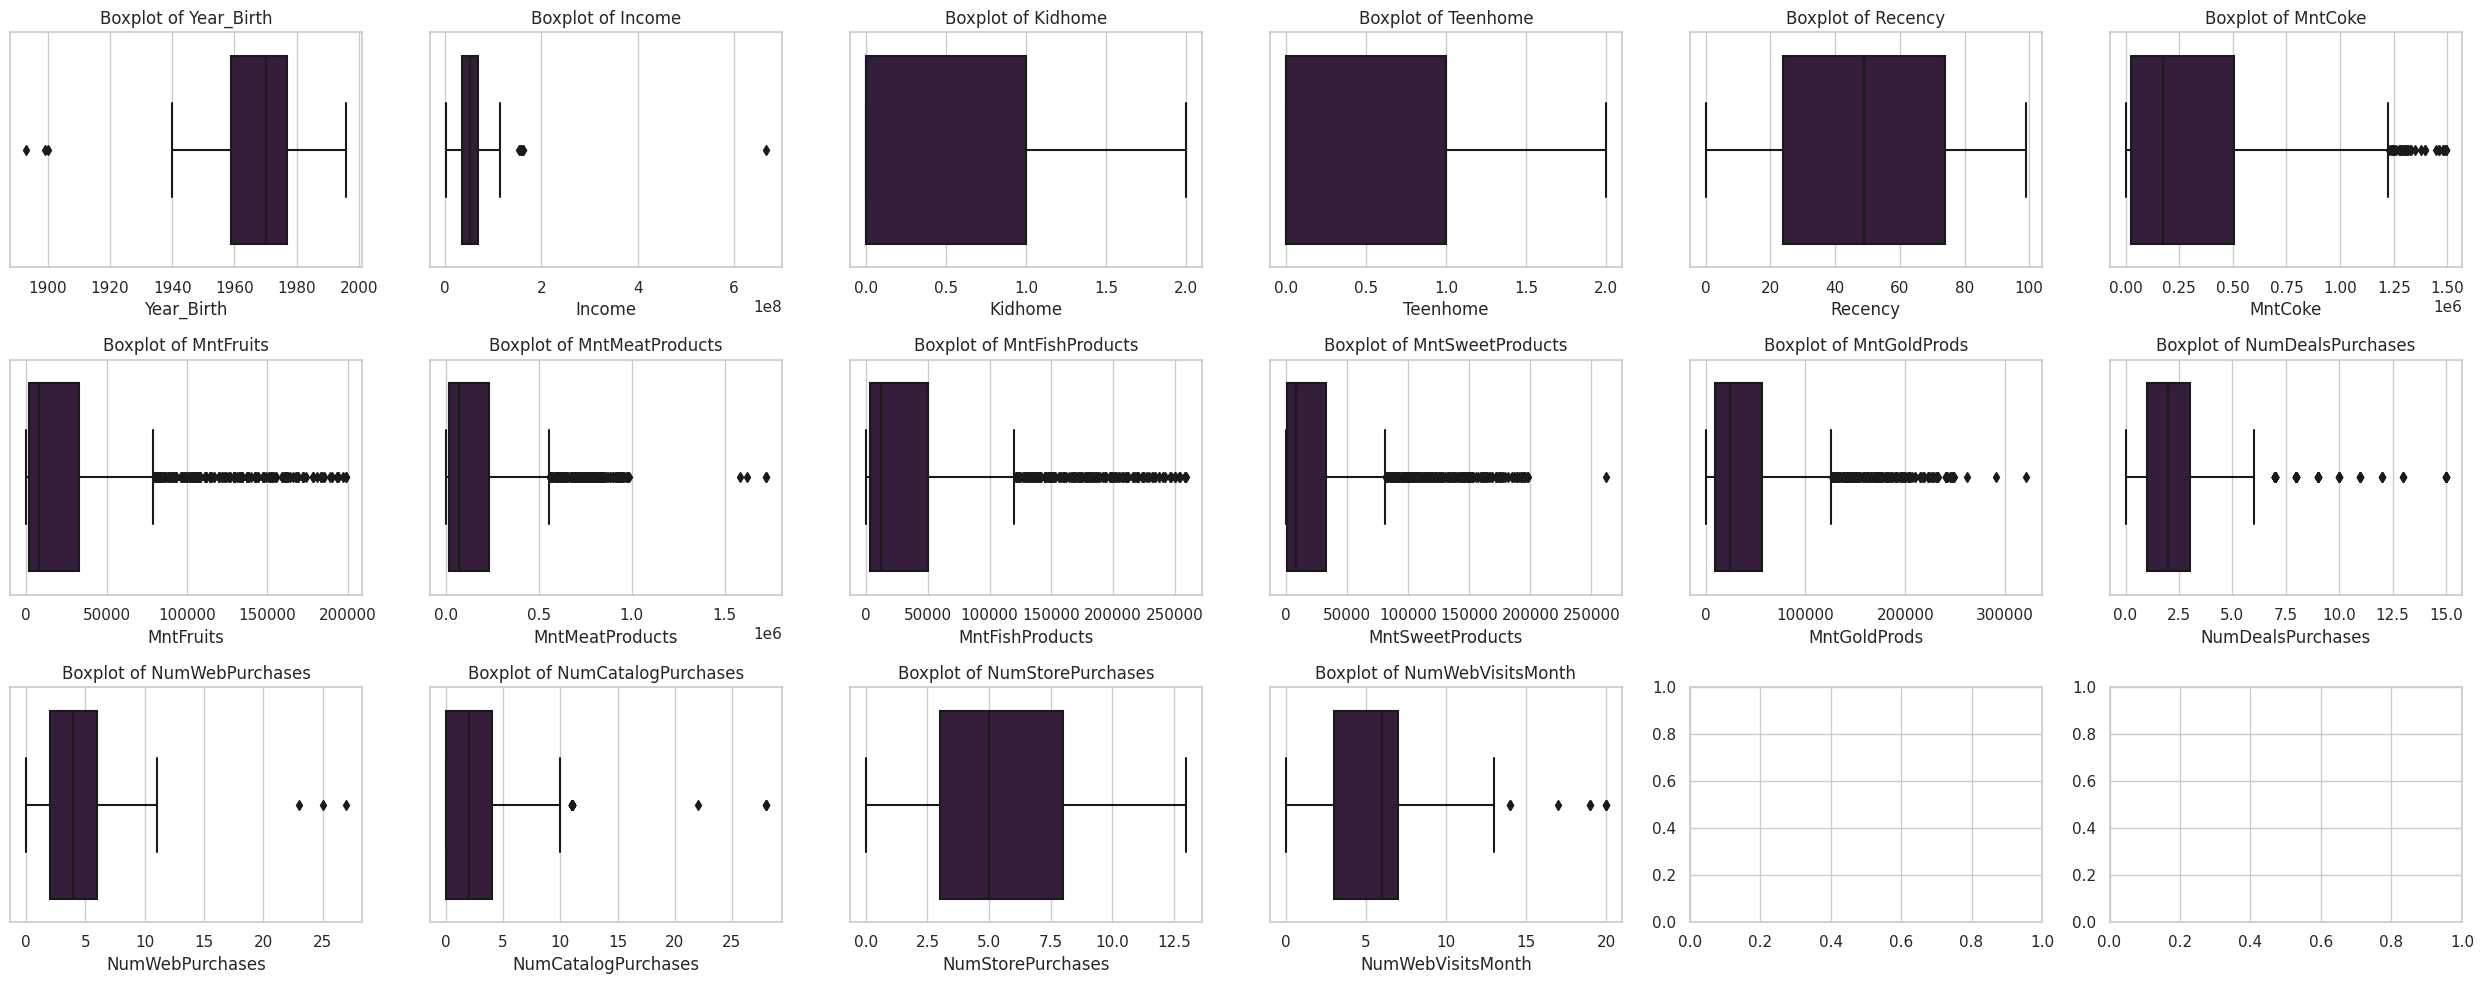

In [ ]:
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

def univariate_eda_numeric(df, num_cols):
    fig, axes = plt.subplots(3, 6, figsize=(25, 10))  # Adjust the figure size as needed
    axes = axes.flatten()

    # Using palette and style for the plot
    sns.set_palette("rocket")
    sns.set_style("whitegrid")

    for i, col in enumerate(num_cols):
        ax = axes[i]

        # Create a boxplot for the numeric column
        sns.boxplot(data=df_cleaned, x=col, ax=ax)

        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Call the function to create the boxplots
univariate_eda_numeric(df_cleaned, num_cols)

In [ ]:
# Columns with a large number of outliers
columns_with_large_outliers = [
    "MntCoke",
    "MntFruits",
    "MntGoldProds",
    "MntFishProducts",
    "MntSweetProducts",
    "MntGoldProds",
    "NumDealsPurchases",
]

# Apply log10 transformation to columns with large outliers
for column in columns_with_large_outliers:
    # Add a small constant to avoid taking the log of zero
    df_cleaned[column] = np.log10(df_cleaned[column] + 1)

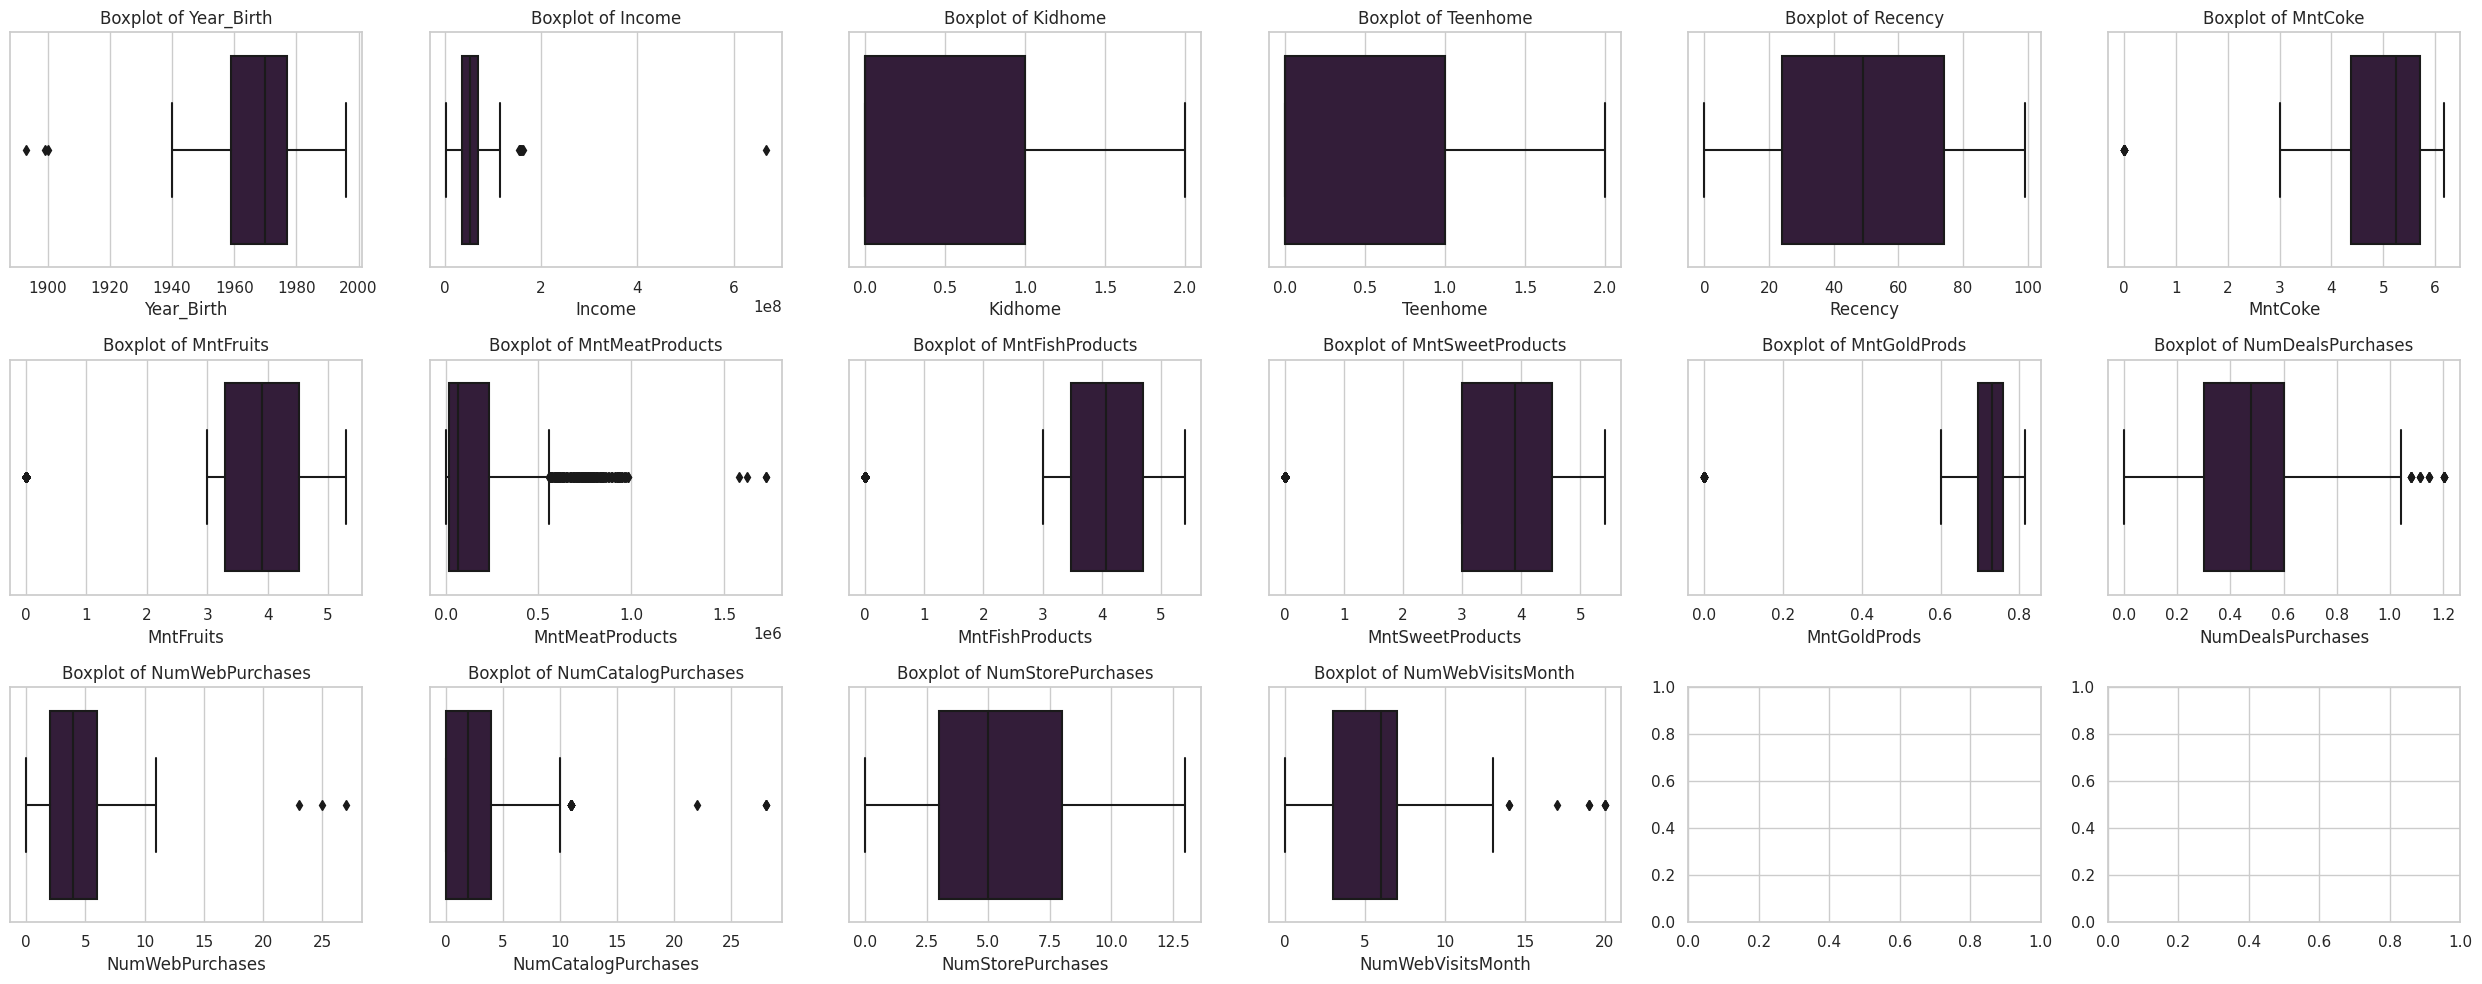

In [ ]:
def univariate_eda_numeric(df, num_cols):
    fig, axes = plt.subplots(3, 6, figsize=(25, 10))  # Adjust the figure size as needed
    axes = axes.flatten()

    # Using palette and style for the plot
    sns.set_palette("rocket")
    sns.set_style("whitegrid")

    for i, col in enumerate(num_cols):
        ax = axes[i]

        # Create a boxplot for the numeric column
        sns.boxplot(data=df_cleaned, x=col, ax=ax)

        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Call the function to create the boxplots
univariate_eda_numeric(df_cleaned, num_cols)

In [ ]:
def remove_outliers_iqr(df, num_cols):
    for column in num_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Menghapus outlier dari kolom-kolom yang telah di-transformasi dengan log10
df_cleaned = remove_outliers_iqr(df_cleaned, num_cols)

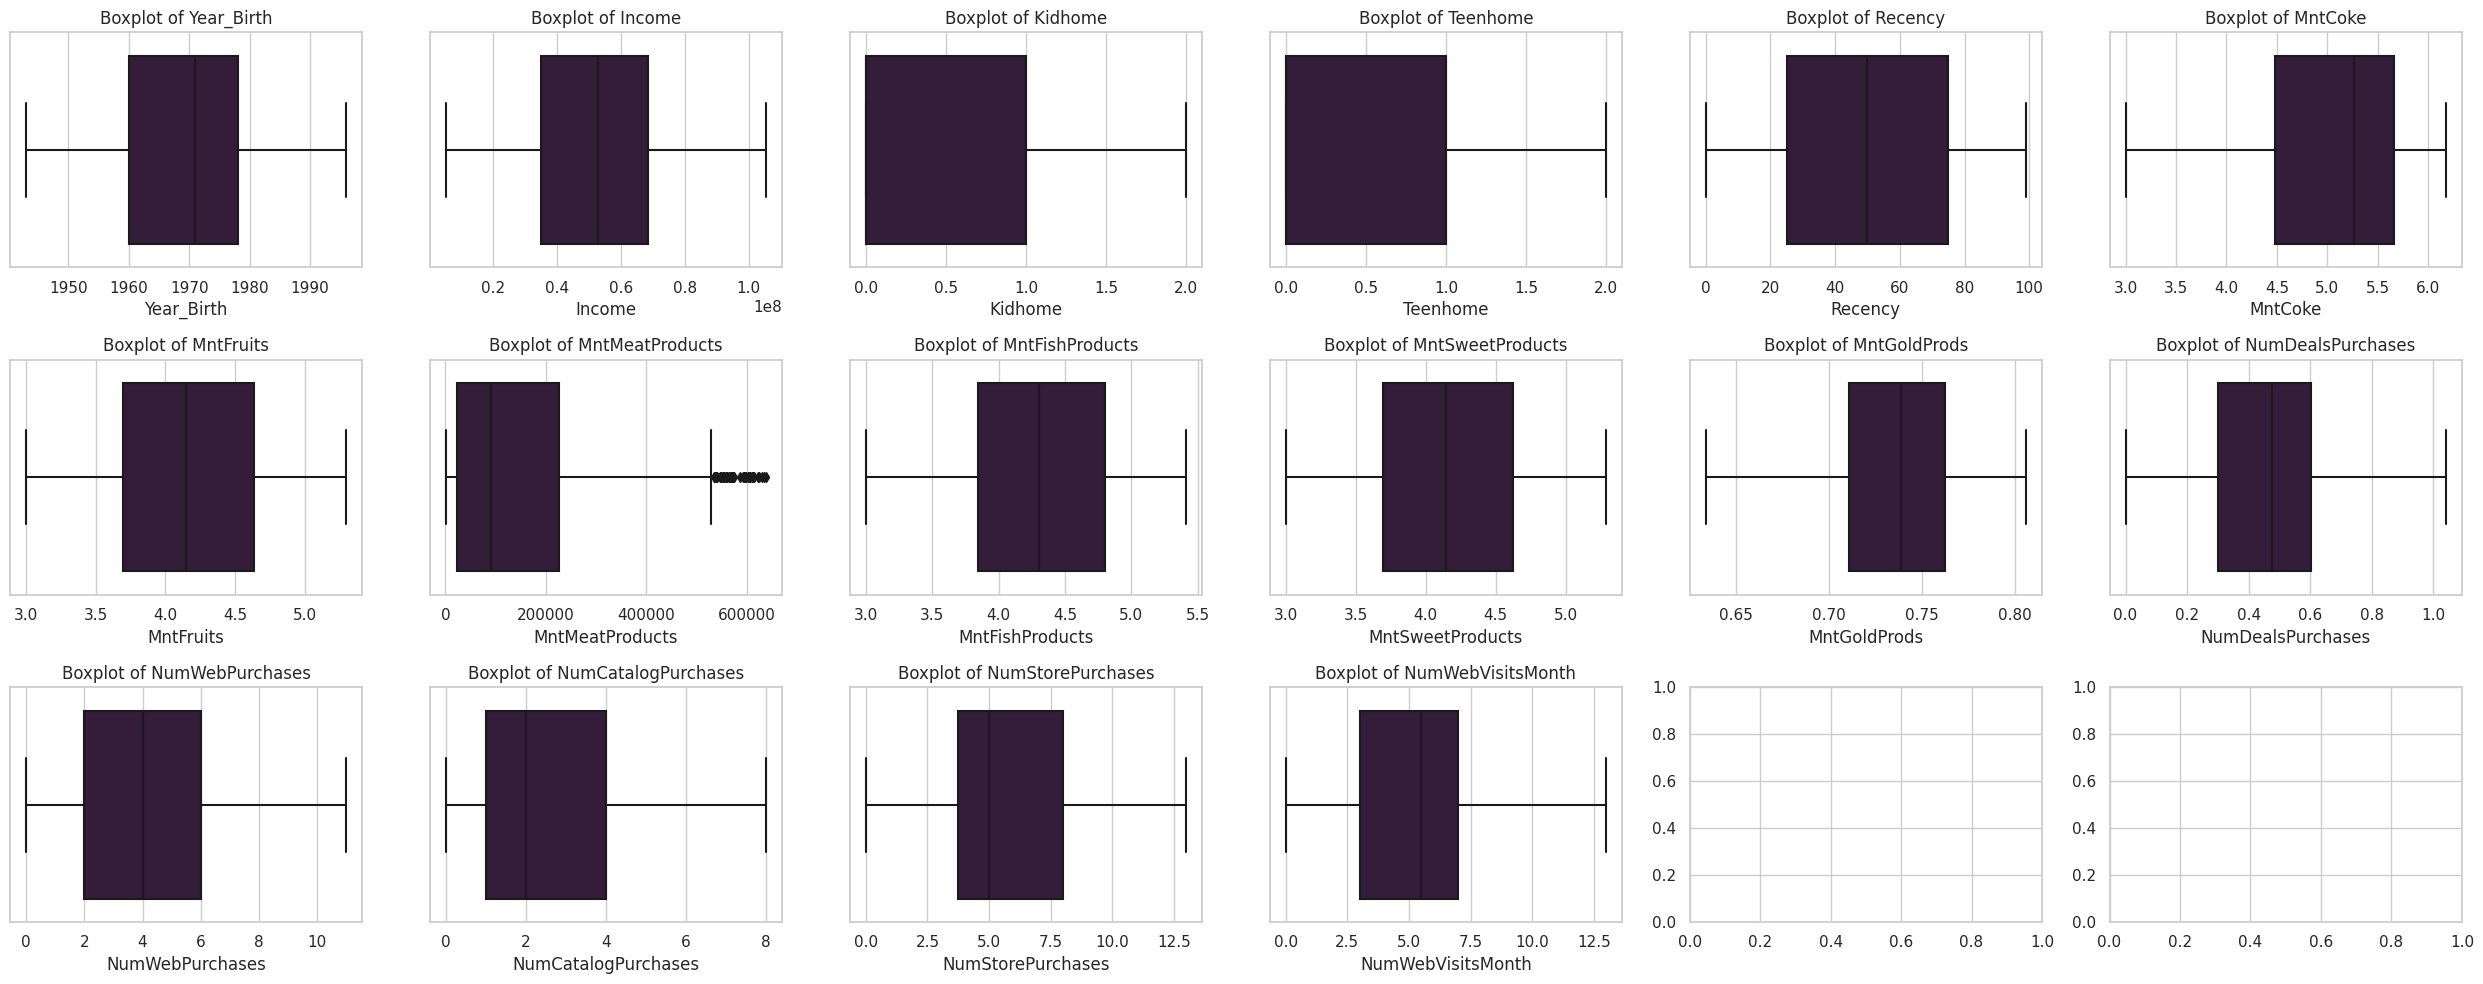

In [ ]:
def univariate_eda_numeric(df, num_cols):
    fig, axes = plt.subplots(3, 6, figsize=(25, 10))  # Adjust the figure size as needed
    axes = axes.flatten()

    # Using palette and style for the plot
    sns.set_palette("rocket")
    sns.set_style("whitegrid")

    for i, col in enumerate(num_cols):
        ax = axes[i]

        # Create a boxplot for the numeric column
        sns.boxplot(data=df_cleaned, x=col, ax=ax)

        ax.set_title(f"Boxplot of {col}")
        ax.set_xlabel(col)

    plt.tight_layout()
    plt.show()

# Call the function to create the boxplots
univariate_eda_numeric(df_cleaned, num_cols)

###Standarize The Data

In [ ]:
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Income']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

###Feature Encoding

In [ ]:
#Applying One-Hot Encoding to "Marital Status" column
df_cleaned = pd.get_dummies(df_cleaned, columns=['Marital_Status'])

#Apllyinh the Label Encoding for "Education", "Age_group", "Recency_group", "Income_level" column
label_encoder = LabelEncoder()
df_cleaned['Education'] = label_encoder.fit_transform(df_cleaned['Education'])
df_cleaned['Age_Group'] = label_encoder.fit_transform(df_cleaned['Age_Group'])
df_cleaned['Recency_Group'] = label_encoder.fit_transform(df_cleaned['Recency_Group'])
df_cleaned['Income_Level'] = label_encoder.fit_transform(df_cleaned['Income_Level'])

# display data after encode
print(df_cleaned)

      Year_Birth  Education    Income   Kidhome  Teenhome   Recency   MntCoke  MntFruits  \
1      -1.326895          1 -0.255554  1.132075  0.993544 -0.391075 -1.238836  -1.927430   
2      -0.384880          1  0.985808 -0.792453 -0.874501 -0.804617  0.754425   0.898856   
3       1.242237          1 -1.223236  1.132075 -0.874501 -0.804617 -1.238836  -0.920978   
4       0.985324          3  0.331451  1.132075 -0.874501  1.538790  0.263179   0.803976   
6       0.128946          1  0.200874 -0.792453  0.993544 -0.528922  0.430150   1.104108   
...          ...        ...       ...       ...       ...       ...       ...        ...   
2234    0.385860          1 -0.841282  1.132075 -0.874501  1.090786 -1.946988  -1.129888   
2235   -0.213605          1  0.475390 -0.792453  0.993544 -0.115380  1.032124   0.803976   
2237    0.985324          1  0.266998 -0.792453 -0.874501  1.435405  1.166985   0.883879   
2238   -1.155620          2  0.869477 -0.792453  0.993544 -1.424931  0.756978   

##Data Modelling

now we getting into the must crucial step of the project and that is the modelling, we gonna create an elbow plot and silhoutte plot to see the optimal cluster and checking the score.

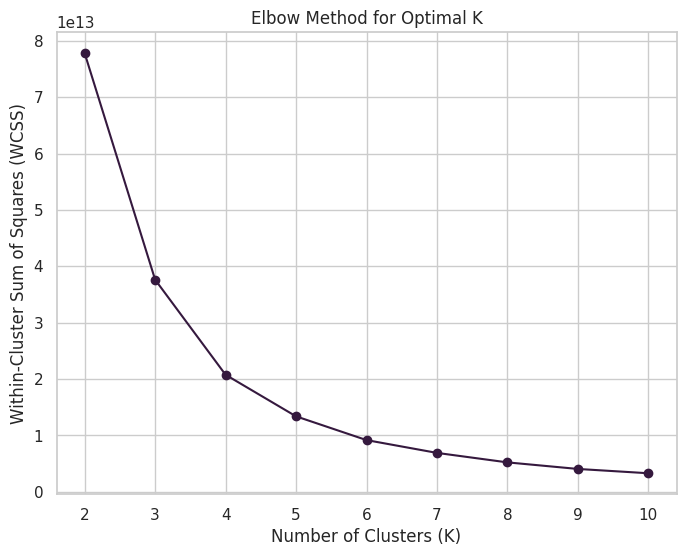

In [ ]:
wcss = []  # Within-cluster sum of squares

for k in range(2, 11):  # You can adjust the range as needed
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_cleaned)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values for different k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [ ]:
optimal_k = 4  # Replace with the number you determined
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned)

In [ ]:
silhouette_avg = silhouette_score(df_cleaned, df_cleaned['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.62


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_cleaned.values)
df_cleaned['cluster'] = kmeans.labels_

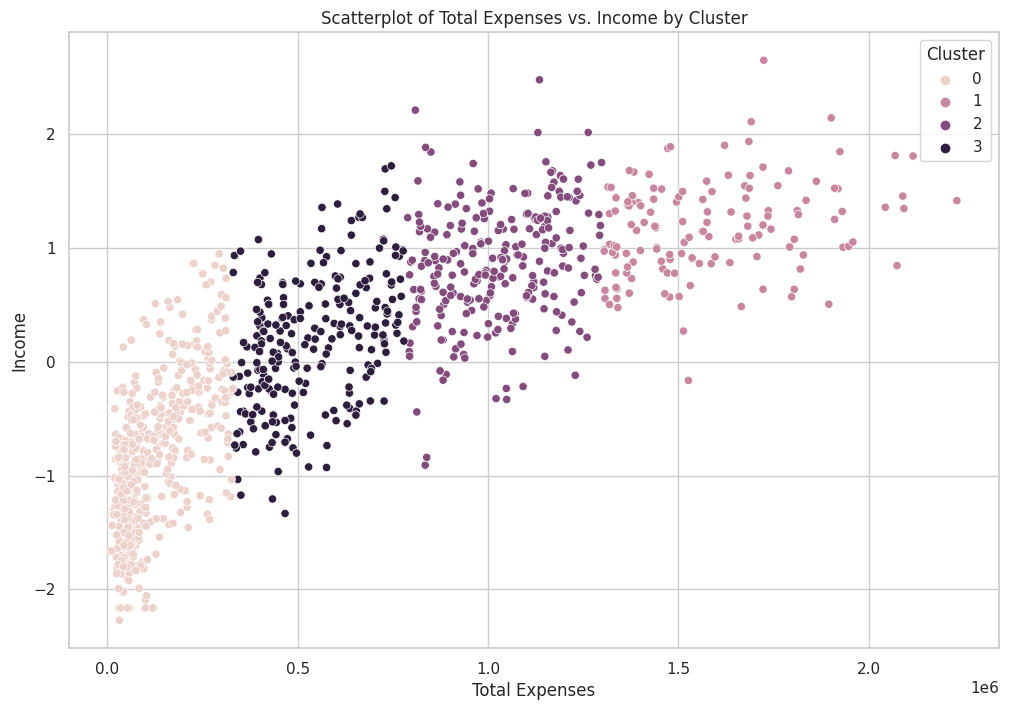

In [ ]:
# Create a scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Total_Expenses', y='Income', hue='cluster')

# Add labels and a legend
plt.xlabel('Total Expenses')
plt.ylabel('Income')
plt.title('Scatterplot of Total Expenses vs. Income by Cluster')
plt.legend(title='Cluster')

# Show the plot
plt.show()

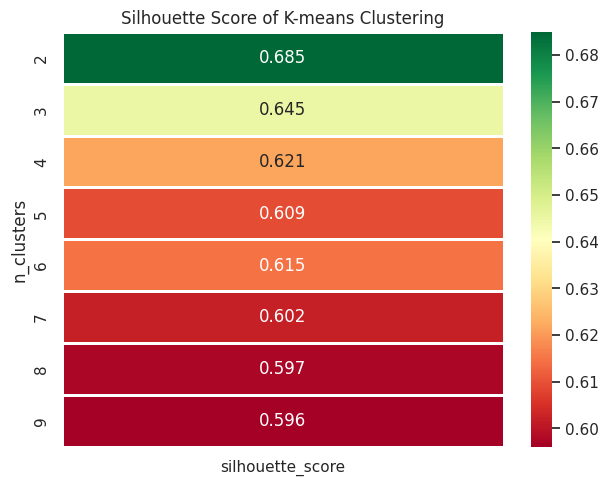

In [ ]:
from sklearn.metrics import silhouette_score

def visualize_silhouette_layer(data):
    clusters_range = range(2, 10)
    results = []

    for i in clusters_range:
        km = KMeans(n_clusters=i, random_state=42)
        cluster_labels = km.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        results.append([i, silhouette_avg])

    result = pd.DataFrame(results, columns=["n_clusters", "silhouette_score"])
    pivot_km = pd.pivot_table(result, index="n_clusters", values="silhouette_score")

    plt.figure()
    sns.heatmap(pivot_km, annot=True, linewidths=1, fmt='.3f', cmap='RdYlGn')
    plt.tight_layout()
    plt.title('Silhouette Score of K-means Clustering')
    plt.show()

# Call the function with df_cleaned
visualize_silhouette_layer(df_cleaned)

In [ ]:
map_cluster = {
    0 : 'Low Prospect',
    1 : 'Risk of Churn',
    2 : 'Mid Prospect',
    3 : 'High Propesct'
}

df_cleaned['cluster_mapped'] = df_cleaned['cluster'].map(map_cluster)

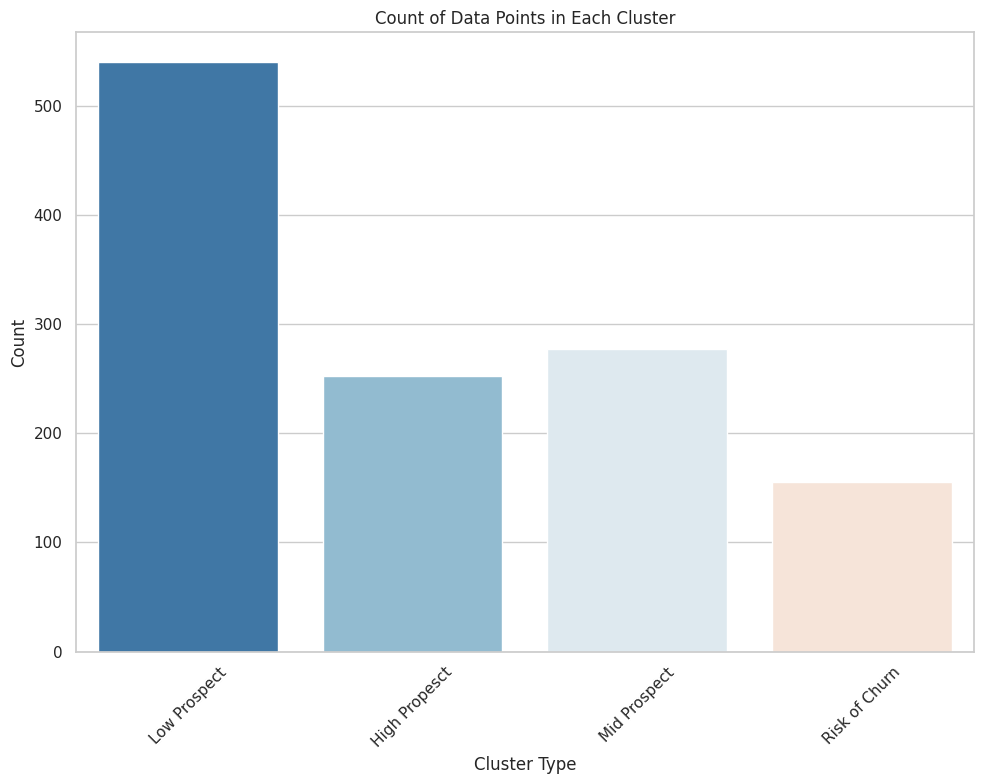

In [ ]:
# Map the clusters to their corresponding labels
df_cleaned['cluster_mapped'] = df_cleaned['cluster'].map(map_cluster)

# Create a countplot of the cluster values
plt.figure(figsize=(10, 8))
sns.set_palette("RdBu_r")
sns.countplot(data=df_cleaned, x='cluster_mapped')
plt.xlabel('Cluster Type')
plt.ylabel('Count')
plt.title('Count of Data Points in Each Cluster')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

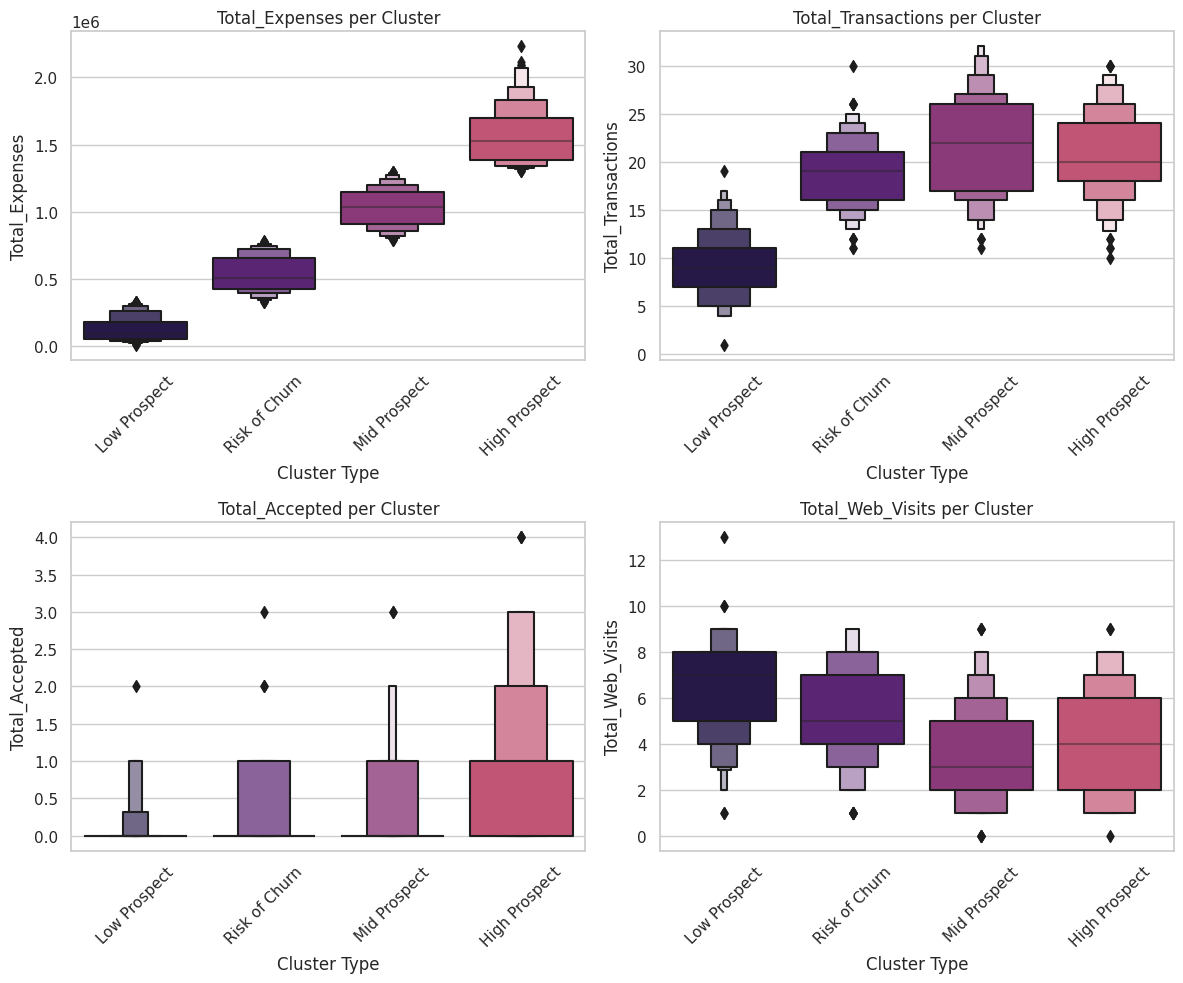

In [ ]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Define the features to be plotted
features = ['Total_Expenses', 'Total_Transactions', 'Total_Accepted', 'Total_Web_Visits']

# Define the cluster mapping
map_cluster = {
    0: 'Low Prospect',
    1: 'Risk of Churn',
    2: 'Mid Prospect',
    3: 'High Prospect'
}

# Set the color palette
sns.set_palette("magma")

# Create boxen plots for each feature
for i, feature in enumerate(features):
    ax = axes[i]
    sns.boxenplot(data=df_cleaned, x='cluster_mapped', y=feature, ax=ax)
    ax.set_title(f'{feature} per Cluster')
    ax.set_xlabel('Cluster Type')
    ax.set_ylabel(feature)
    ax.set_xticklabels([map_cluster[i] for i in range(4)])  # Use the cluster mapping
    ax.tick_params(axis='x', rotation=45)

# Adjust subplot layout
plt.tight_layout()

# Show the plot
plt.show()

* **Cluster Summary Based on The Plot**
 * `low Prospect` : they were very low at spending and buying something on their money to actually buy one of the product, but yet the had the most total clicked on the website.
 * `Risk of Churn` : this cluster is a mid spender and buyer on the event and has secondd of the most clicked total on the website.
 * `Mid Prospect` : this is the trusty prospect to actually interested on spending their mmoney on the campaign even though they had very low clicked total on the website.
 * `High Prospect` : this is the most guarantee prospect we had, they had very high expenses and transactions of all of this cluster, even though just like the `Mid Prospect` they had very low clicked total, but when they do clicked it's a guarantee that they will accepted



## Business Recommendation

Based on the clustering analysis of customer segments, we propose the following recommendations for optimizing the marketing campaign:

* **Segment-Specific Targeting**:

 * Tailor marketing efforts to each customer segment's unique characteristics.
For the `"Low Prospect"` segment, focus on converting high website engagement into actual purchases by providing compelling incentives.
 * The `"Risk of Churn"` segment should be targeted with personalized offers and retention strategies to prevent them from exploring alternatives.
 * `"Mid Prospect"` customers represent a potential growth opportunity. Enhance their website experience and encourage purchases through user-friendly interfaces.
 * Prioritize the `"High Prospect"` group by offering exclusive and high-value products or services, as they have shown strong purchase potential.


* Conversion Rate Optimization:

 * Implement data-driven strategies to improve conversion rates for each segment.
 * A/B testing and targeted promotions can be used to refine conversion funnels for different clusters.
 * For the `"Low Prospect"` and `"Risk of Churn"` groups, consider implementing retargeting campaigns to re-engage potential customers who have shown interest.

* Customer Engagement Enhancement:

 * Develop loyalty programs and incentives tailored to the `"High Prospect"` group to increase their loyalty and lifetime value.
 * Use data analytics to identify high-value products or services for this segment.

#Calculate The Impact

In [ ]:
# Calculate the sum of total expenses for each cluster
cluster_expense_sum = df_cleaned.groupby('cluster_mapped')['Total_Expenses'].sum()

# Format the results with a dollar sign
cluster_expense_sum = cluster_expense_sum.map('${:,.2f}'.format)

# Display the impact for each cluster
print("Impact of Total Expenses by Cluster:")
print(cluster_expense_sum)

Impact of Total Expenses by Cluster:
cluster_mapped
High Propesct    $135,285,000.00
Low Prospect      $66,891,000.00
Mid Prospect     $285,418,000.00
Risk of Churn    $243,629,000.00
Name: Total_Expenses, dtype: object
